In [1]:
# Importing libraries
import numpy as np
import scipy
from scipy.fft import fft, fftfreq
from scipy import signal, integrate
from scipy import optimize
import matplotlib.pyplot as plt


# To show figures in the notebook
%matplotlib inline

# Make the figures more readable
newparams = {
    'figure.figsize': (18, 9), 
    'axes.grid': False,
    'lines.linewidth': 2,
    'font.size': 25,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral'
    }

# figure.figsize sets the size of the figure (values are in inches)
# axes.grid, set to False means that there is no grid
# lines.linewidth sets the thickness of the lines in the plot
# font.size sets the size of the text (ticks, title, xlabel, etc.)
# mathtext.fontset sets the font of the text of the type r'$tekst$' (math text)
# font.family sets the font of ordinary text (ticks, title, xlabel, etc.)

# There are several other parameters you can change, and you can look them up in the documentation 
# for matplotlib if you need to change any. 

plt.rcParams.update(newparams) # Updates the parameter set above. 

In [2]:
def plot_func(t_num_arr, values_2d_arr, label_arr, title_name, x_axis_name, y_axis_name, horizontal_lines=[],vertical_lines=[] ):
    '''
    Plottefunksjon for grafisk fremstilling av vår data.
    Inn:
        t_num_arr: 2D-array, t-verdier som vil plottes langs x-aksen
        values_2d_arr: 2D-array, vilkårig data som vil plottes langs y-aksen
        label_arr: array, array som inneholder labelsene til de ulike funksjonene
        title_name: string, figurens tittel
        x_axis_name: string, navnet til x-aksen
        y_axis_name: string, navnet til y-aksen
        horizontal_lines: list, 
        vertical_lines: list, 
    '''
    for i in range(len(values_2d_arr)):
        plt.plot(t_num_arr, values_2d_arr[i], label = label_arr[i])
    for i in horizontal_lines:
        plt.axhline(i,color="black",linestyle="--")

    for i in vertical_lines:
        plt.axvline(i,color="black",linestyle="--")

    plt.title(title_name)
    plt.xlabel(x_axis_name)           
    plt.ylabel(y_axis_name)   
    # plt.ylim(-0.25,0.25)        
    plt.legend(loc=2, shadow = True)
    plt.show()

In [3]:
# Parameters
g = 9.81 # Gravitational acceleration, [m/s^2]

sigma_0 = 1000 # Mass density of water, [kg/m^2]
sigma = 500 # Mass density of boat, [kg/m^2]

R = 10 # m, Radius of boat
A_s = 0.5*np.pi*(R**2) # Area of the boat's cross-section, [m^2]
A_0 = (sigma*np.pi*(R**2))/(2*sigma_0) # Water displaced by boat at equilibrium, [m^2]
h = (4*R)/(3*np.pi) # Distance from the middle of the boats deck to the center of gravity, [m]

m_boat = A_s*sigma # The mass of the boat, [kg]

In [4]:
water_area = lambda gamma_number: 0.5*(R**2)*(gamma_number - np.sin(gamma_number))

In [5]:
gamma = lambda beta, theta, delta_y_c : 2*np.arccos(np.cos(beta/2)-(4/(3*np.pi))*(1-np.cos(theta))+delta_y_c/R)

In [6]:
def calculate_beta(rhs_constant, x0, tol=1.e-8, max_iter=50):
    ''' Given a right hand side and left hand side of a function and its derivatives, calculates the beta value of the function.
    
    Solve f(x)=0 by Newtons method, 
    
        The output of each iteration is printed
        Input:
        f_lhs: left hand side of function
        df_lhs: left hand side of derivative of function
        f_rhs: right hand side of function
        df_rhs: right hand side of derivative of function
        x0:  Initial values
        tol: The tolerance
      Output:
        The root and the number of iterations
    '''

    f = lambda beta: beta - np.sin(beta) - rhs_constant
    df = lambda beta: 1 - np.cos(beta)


    x = x0
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
    return x

In [7]:
def print_beta():
    beta = calculate_beta(np.pi*sigma/sigma_0,5)
    print("Beta =",round(np.degrees(beta), 2),"degrees")
print_beta()

Beta = 132.35 degrees


In [8]:
def calculate_I_c(m_load = 0, s_L = 0, m_p = 0):
    '''
    This function calculated the ships total rotational inertia of the ship and its load, at the
    relative position of the load affects the total rotational inertia.
    Input:
        m_load: float, the mass of the load [kg]
        s_L:    float, the loads distance from the metacenter [m]
    Output:
        I_c:    float, the ships total rotational inertia [kg/m²]
    '''
    #   Boat
    I_boat = 0.5*m_boat*(R**2)*(1-(32/(9*(np.pi**2)))) # Rotational inertia from the ship about C

    #   Load
    r_load = np.sqrt( h**2 + s_L**2 ) # Distance from ship's CM to load's CM
    I_load = m_load*r_load**2   # Rotational inertia from the load about C 
    
    #   Passanger (spoiler)
    r_p = h
    I_p = m_p*r_p**2

    I_c = I_load + I_boat + I_p # Use the superposition property of rotational inertias (Steiner's Thm).
    return I_c

In [9]:
#F_G = lambda m : -m*g
#F_B = lambda A : A*sigma_0*g

In [10]:
#friction = lambda k_f, omega, gamma_number : -k_f * R * gamma_number*omega

In [11]:
#Define the global variables for the equilibrium
#y_M_0 = lambda beta: R*np.cos(beta/2)
#y_C_0 = lambda beta: y_M_0(beta) - 4*R/(3*np.pi)
#y_B_0 = lambda beta: y_M_0(beta) - 4*R*(np.sin(beta/2))**3 /(3*(beta-np.sin(beta)))
#y_D_0 = lambda beta: y_M_0(beta) - R

#Values as functions of delta y_C and theta. 
#y_M = lambda beta, theta, delta_y_C : y_M_0(beta) + ((4*R)/(3*np.pi))*(np.cos(theta)-1) + delta_y_C
#y_C = lambda beta,delta_y_c : y_C_0(beta) + delta_y_c
#y_D = lambda beta, theta, delta_y_c : y_D_0(beta) + ((4*R)/(3*np.pi))*(np.cos(theta)-1) + delta_y_c
#y_B = lambda beta: y_B_0(beta)

In [12]:
##Define the global variables for the equilibrium, as requested in 1b)
y_M_0 = lambda beta: R*np.cos(beta/2)
y_C_0 = lambda beta: y_M_0(beta) - 4*R/(3*np.pi)
y_B_0 = lambda beta: y_M_0(beta) - 4*R*(np.sin(beta/2))**3 /(3*(beta-np.sin(beta)))
y_D_0 = lambda beta: y_M_0(beta) - R

# Values as functions of delta y_C and theta. 
y_M = lambda beta, theta, delta_y_C : y_M_0(beta) + ((4*R)/(3*np.pi))*(np.cos(theta)-1) + delta_y_C
y_C = lambda beta,delta_y_c : y_C_0(beta) + delta_y_c
y_D = lambda beta, theta, delta_y_c : y_D_0(beta) + ((4*R)/(3*np.pi))*(np.cos(theta)-1) + delta_y_c
y_B = lambda beta: y_B_0(beta)

# Note: beta is a global variable
gamma = lambda beta, theta, delta_y_c : 2*np.arccos(np.cos(beta/2)-(4/(3*np.pi))*(1-np.cos(theta))+delta_y_c/R)

water_area = lambda gamma_number: 0.5*(R**2)*(gamma_number - np.sin(gamma_number))

F_G = lambda m : m*g
F_B = lambda A : A*sigma_0*g
friction = lambda k_f, omega, gamma_number : -k_f * R * gamma_number*omega

In [13]:
def euler_step(f, t, w, h_step):
    '''
    Tar inn en vektor-funksjon på formen w = [theta(t), omega(t)], med nåværende tid (t) og 
    tilstand (w), og regner ut ett Euler-steg.
    Inn:
        f: s-array, som beskriver et system av førsteordens diff-ligninger.
        t: float, nåvernde tid
        w: s-array, som beskriver systemet
        h_step: steglengde
    Ut:
        t_new: neste tidssteg (t+h)
        w_new: systemet etter ett beregnet tidssteg    
    '''
    
    w_new = w + h_step*f(t, w)
    return t+h_step, w_new

In [14]:
def solve_ODE(f, t_span, w_0, first_step, method, fixed_step = True, tol = 1e-6, max_iter = 1e5):
    '''
    Funksjon som løser differensial ligninger på en brukerdefinert måte.
    Inn:
        f: s-array, som beskriver et system av førsteordens diff-ligninger.
        t_span: 2-tuple of floats:
            t_0: float, starttid
            t_end: float, slittid
        w_0: s-array, som systemets startposisjon
        first_step: Dersom vi ønsker dynamisk steglengde vil dette være startsteglengden
            ellers blir dette den konstante steglengden
        tol: The tollerance if we wish to use adaptive step size
    Ut:
        t_num: array, tidsstegene
        w_num: s-array, de beregnede verdiene for theta of omega    
    '''
    t_0 = t_span[0]
    t_end = t_span[1]

    t_num = np.array([t_0])
    w_num = w_0
    # Set the running values
    t_n = t_0
    w_i = w_0
    h_step = first_step
    

    if fixed_step:
        N = int( (t_end-t_0)/h_step + 1)
        t_num, h_step = np.linspace(t_0, t_end, N, retstep=True)  # Use linpace, as numpys documentation suggests this for
                                            # non-integer values, we also get the closed interval [t_0, t_end].
        # print(f't_num:\n {t_num}\n t_num minus one:\n {t_num[0:-1]}')        

        # This loop will iterate over all the t-values exept the last one. The reason for this is because the w corresponding
        # to the last t-value is calculated at the second last t-value, and so, both arrays have an equal lenght.
        for t_n in t_num[0:-1]: 
            w_i = method(f, t_n, w_i, h_step)[1] # Here we are only interrested in w, as the step size is fixed
            #print(f'w_num:\n {w_num}\n\n w_{i+1}:\n {w_n}\n\n\n\n ')
            w_num = np.concatenate(( w_num, w_i), axis=1)

    else: 
        current_iter = 0
        while t_n < t_end-1e-10: # take truncation error into account        
            if t_n + h_step > t_end:
                h_step = t_end-t_n
                
            # One step with the method:
            t_try, w_try, err_est, p = method(f, t_n, w_n, h_step)
            current_f_calls += 1
            
            if err_est <= tol:
                # Use the solution
                t_n = t_try
                w_n = w_try
                
                # Store the solutions
                t_num = np.append(t_num, t_n)           
                w_num = np.concatenate((w_num, np.array([w_n])))
                
            
            # Adjust the step size, start by defining facors
            P = 0.8 # Pessismist facor, normally between 0.5 and 0.95
            
            h_step = P*( (tol/err_est)**(1/(p+1)) )*h_step

            if current_iter >= max_iter:
                print('Maximum number of function calls are reached.')
                return t_num, w_num

    return t_num, w_num

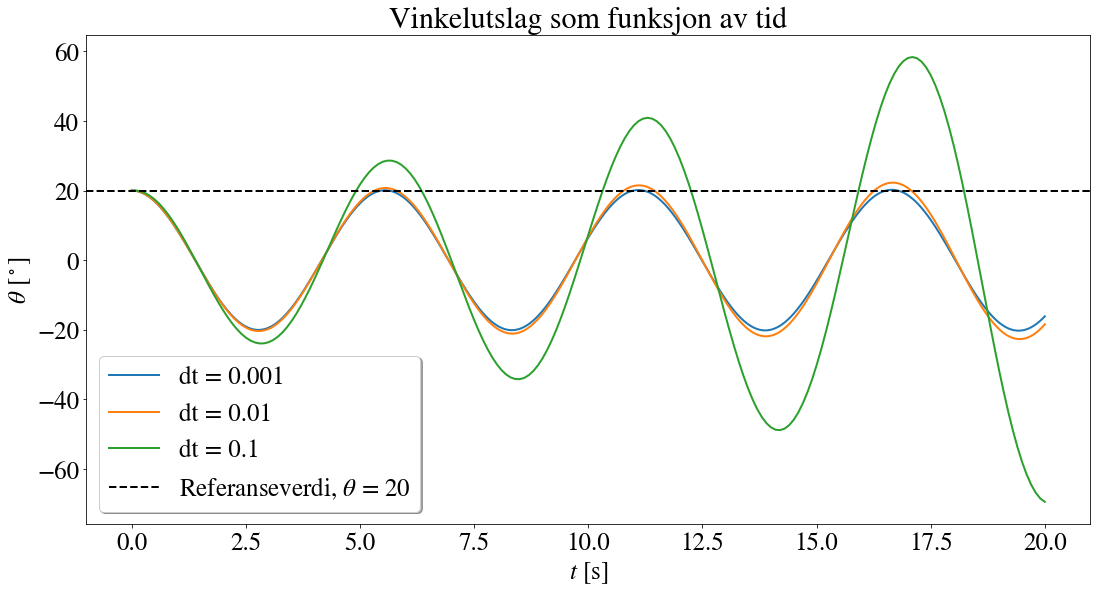

In [15]:
def test_euler():
    # f = lambda t, w: np.array([
    #     w[1],
    #     -(A_0 * sigma_0 * g * h)/calculate_I_c(0, 0) * np.sin( w[0] )
    #     ])
    
    # This function is equivalent
    def f(t, w):
        dw = np.array([
            w[1],
            -(A_0 * sigma_0 * g * h)/calculate_I_c(0, 0) * np.sin( w[0] )
        ])
        return dw

    # Define the inital condititons, time intervall, and step size
    theta_0 = np.array([np.radians(20)])
    omega_0 = np.array([0])
    w_0 = np.array([theta_0, omega_0]) # Combine all the initial conditions to the array w

    t_0 = 0
    t_end = 20

    # The step sizes of our simulation
    h_step1 = 0.001  
    h_step2 = 0.01
    h_step3 = 0.1


    # Calculate the angles and angle velocities in the given time intervall using the Euler method
    t_num1, w_num1 = solve_ODE(f, (t_0, t_end), w_0, h_step1, euler_step)
    t_num2, w_num2 = solve_ODE(f, (t_0, t_end), w_0, h_step2, euler_step)
    t_num3, w_num3 = solve_ODE(f, (t_0, t_end), w_0, h_step3, euler_step)


    theta_num1, omega_num = w_num1[0:2]
    theta_num2, omega_num = w_num2[0:2]
    theta_num3, omega_num = w_num3[0:2]

    # Plot the angles vs time
    plt.plot(t_num1, np.rad2deg(theta_num1), label = "dt = 0.001")
    plt.plot(t_num2, np.rad2deg(theta_num2), label = "dt = 0.01")
    plt.plot(t_num3, np.rad2deg(theta_num3), label = "dt = 0.1")
    plt.axhline(20, color = "black", linestyle = "--", label = r"Referanseverdi, $\theta$ = 20")
    plt.title("Vinkelutslag som funksjon av tid")
    plt.xlabel('$t$ [s]')           
    plt.ylabel(r'$\theta$ [$^\circ$]')   
    # plt.ylim(-0.4,0.4)        
    plt.legend(loc=3, shadow = True)
    plt.show()   

test_euler()

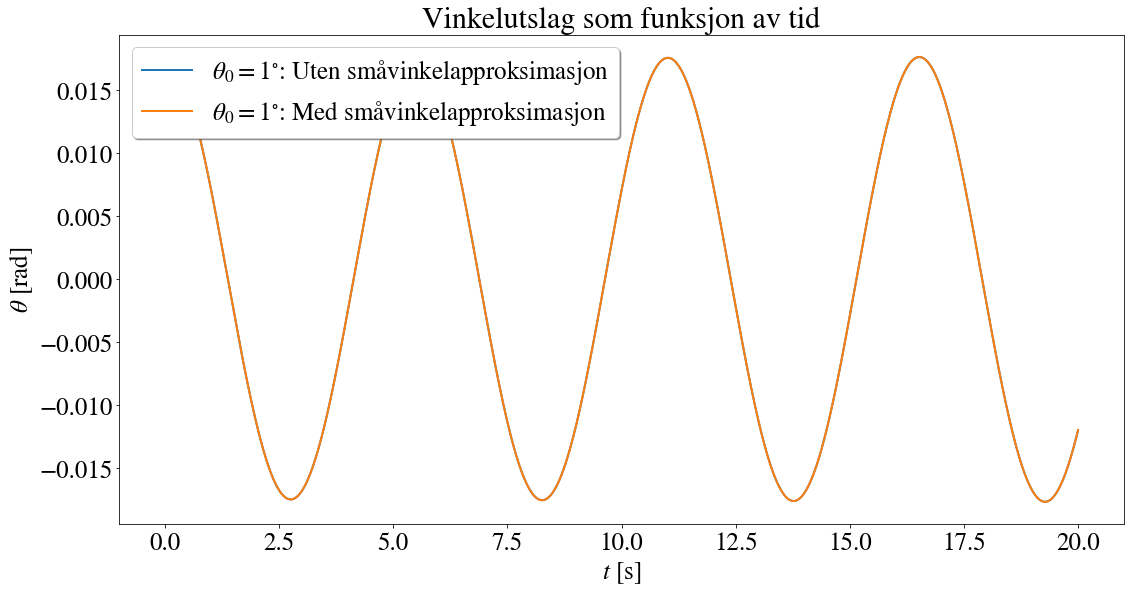

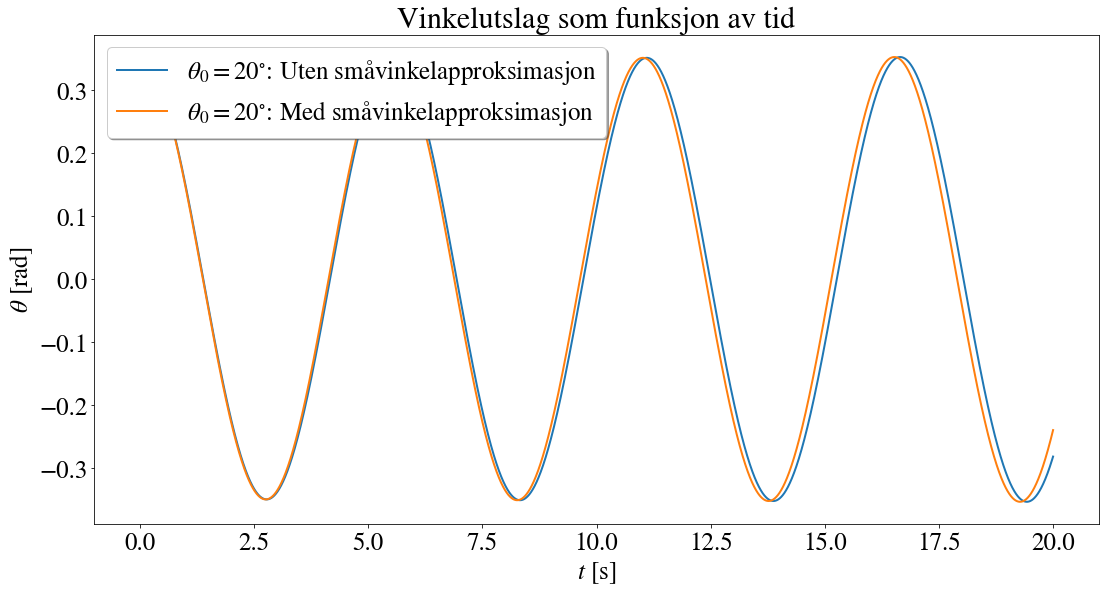

In [16]:
def angle_approx_comparison():
    # def f(t, w):
    #     const = (A_s*sigma * g * h)/calculate_I_c(0, 0)
    #     return np.array([w[1], -const*np.sin(w[0]),0,0,0,0,0,0])

    # def f_small_angle(t, w):
    #     const = (A_s*sigma * g * h)/calculate_I_c(0, 0)
    #     return np.array([w[1], -const*w[0],0,0,0,0,0,0])

    #######################################################################################
    #       Define the functions differential equations that we will be solving
    f = lambda t, w: np.array([
        w[1],
        -(A_s*sigma * g * h)/calculate_I_c(0, 0) * np.sin(w[0])
    ])
    f_small_angle = lambda t, w: np.array([
        w[1],
        -(A_s*sigma * g * h)/calculate_I_c(0, 0) * w[0]
    ])

    #######################################################################################
    #       Define the inital condititons, time intervall, and step size
    theta_0_20 = np.array([np.radians(20)])
    theta_0_1 = np.array([np.radians(1)])
    omega_0 = np.array([0])
    w_0_20 = np.array([theta_0_20, omega_0]) # Combine all the initial conditions to the array w
    w_0_1 = np.array([theta_0_1, omega_0]) # Combine all the initial conditions to the array w

    t_0 = 0
    t_end = 20
    h_step = 0.001  #The step size of our simulation
    
    #######################################################################################
    #       Solve diff. eqn. by the given methods, and 
    t_num_20, w_num_20 = solve_ODE(f, (t_0, t_end), w_0_20, h_step, euler_step)
    t_num_small_angle_approx_20, w_num_small_angle_approx_20 = solve_ODE(f_small_angle, (t_0, t_end), w_0_20, h_step,euler_step)
    
    t_num_1, w_num_1 = solve_ODE(f, (t_0, t_end), w_0_1, h_step, euler_step)
    t_num_small_angle_approx_1, w_num_small_angle_approx_1 = solve_ODE(f_small_angle, (t_0, t_end), w_0_1, h_step,euler_step)

    # Add the data to assays
    theta_arr_20 = [w_num_20[0], w_num_small_angle_approx_20[0]]
    labels_arr_20 = [r"$\theta_{0} = 20^{\circ}$: Uten småvinkelapproksimasjon", r"$\theta_{0} = 20^{\circ}$: Med småvinkelapproksimasjon"]
    theta_arr_1 = [w_num_1[0], w_num_small_angle_approx_1[0]]
    labels_arr_1 = [r"$\theta_{0} = 1^{\circ}$: Uten småvinkelapproksimasjon", r"$\theta_{0} = 1^{\circ}$: Med småvinkelapproksimasjon"] 
    
    # Use the the plotting-funciton to plot the results
    plot_func(t_num_1, theta_arr_1, labels_arr_1, "Vinkelutslag som funksjon av tid", '$t$ [s]', r'$\theta$ [rad]')
    plot_func(t_num_1, theta_arr_20, labels_arr_20, "Vinkelutslag som funksjon av tid", '$t$ [s]', r'$\theta$ [rad]')

angle_approx_comparison()

In [17]:
def rk4_step(f, t, w, h):
    '''
    Tar inn en vektor-funksjon på formen f(t, _w_) = _y'_ = _y_ + _g(x)_, med nåværende tid (t) og 
    tilstand (w), og regner ut ett Runge Kutta steg.
    Inn:
        f: s-array, som beskriver et system av førsteordens diff-ligninger.
        t: float, nåvernde tid
        w: s-array, som beskriver systemet
    Ut:
        t_new: neste tidssteg (t+h)
        w_new: systemet etter ett beregnet tidssteg    
    '''

    k_1 = f(t, w)
    k_2 = f(t + 0.5*h, w + h*k_1*0.5)
    k_3 = f(t + 0.5*h, w + h*k_2*0.5)
    k_4 = f(t + 1.0*h, w + h*k_3)

    w_new = w + h*(1/6) * (k_1 + 2*k_2 + 2*k_3 + k_4)
    t_new = t + h
    
    return t_new, w_new

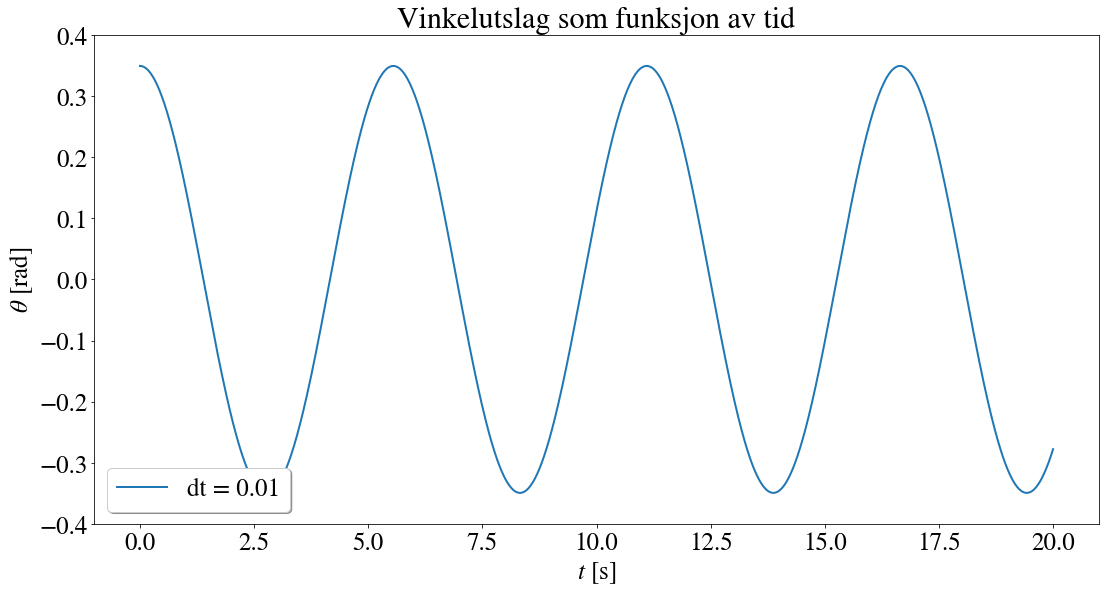

In [18]:
def test_runge_kutta():

    # def f(t, w):
    #     const = (A_s*sigma * g * h)/calculate_I_c(0, 0)
    #     return np.array([w[1], -const*np.sin(w[0]),0,0,0,0,0,0])
    
    #######################################################################################
    #       Define the functions differential equations that we will be solving
    f = lambda t, w: np.array([
        w[1],
        -(A_0 * sigma_0 * g * h)/calculate_I_c(0, 0) * np.sin( w[0] )
        ])


    #######################################################################################
    #       Define the inital condititons, time intervall, and step size
    theta_0 = np.array([np.radians(20)])
    omega_0 = np.array([0])
    w_0 = np.array([theta_0, omega_0]) # Combine all the initial conditions to the array w

    t_0 = 0
    t_end = 20

    h_step = 0.01  #The step size of our simulation
    #######################################################################################

    t_num_rk4, w_num_rk4 = solve_ODE(f, (t_0, t_end), w_0, h_step, rk4_step)
    theta_num_rk4, omega_num_rk = w_num_rk4[0:2]


    plt.plot(t_num_rk4, theta_num_rk4, label = "dt = 0.01")
    plt.title("Vinkelutslag som funksjon av tid")
    plt.xlabel('$t$ [s]')           
    plt.ylabel(r'$\theta$ [rad]')   
    plt.ylim(-0.4,0.4)        
    plt.legend(loc=3, shadow = True)
    plt.show()
    
test_runge_kutta()

In [19]:
def anal_vs_num():
    #######################################################################################
    #       Define the functions differential equations that we will be solving
    def f_analytic(t, theta_0):
        return theta_0*np.cos( np.sqrt( (m_boat*g*h)/calculate_I_c(0, 0) )*t )
    
    # To be used in numerical solutions
    f_small_angle = lambda t, w: np.array([
        w[1],
        -(A_0 * sigma_0 * g * h)/calculate_I_c(0, 0) * w[0]
        ])
    f_not_small_angle = lambda t, w: np.array([
        w[1],
        -(A_0 * sigma_0 * g * h)/calculate_I_c(0, 0) * np.sin( w[0] )
        ])
    
    # def f_small_angle(t, w):
    #     const = (A_s*sigma * g * h)/calculate_I_c(0, 0)
    #     return np.array([w[1], -const*w[0],0,0,0,0,0,0])
    # def f_not_small_angle(t, w):
    #     const = (A_s*sigma * g * h)/calculate_I_c(0, 0)
    #     return np.array([w[1], -const*  np.sin(w[0]),0,0,0,0,0,0])


    # theta_0 = np.radians(0.01)
    # omega_0 = 0
    # w_0 = np.array([theta_0, omega_0,0,0,0,0,0,0])

    # t_0 = 0
    # t_end = 20


    #######################################################################################
    #       Define the inital condititons, time intervall, the array of step sizes, 
    #       and the analytic value at t=20s
    theta_0 = np.array([0.01])
    omega_0 = np.array([0])
    w_0 = np.array([
        theta_0, 
        omega_0
    ]) # Combine all the initial conditions to the array w

    t_0 = 0
    t_end = 20

    h_steps = 10**np.linspace(-1, -4, 30) #logaritmic linspace


    #######################################################################################
    #       Find the values of different methods (including analytic) at t=20s
    #       using different step sizes
    f_analytic_t_20 = f_analytic(t_end, theta_0) # Analytic value at t=20s

    theta_t20_arr_euler = np.array([])
    theta_t20_arr_rk4 = np.array([])

    # Iterate through all the desired step sizes, and store them
    for h_step in h_steps:
        theta_euler    =   solve_ODE(f_small_angle, (t_0, t_end), w_0, h_step, euler_step)[1][0] #[1]: w, [0]: theta
        theta_rk4      =   solve_ODE(f_small_angle, (t_0, t_end), w_0, h_step, rk4_step)[1][0]
        
        # t_euler, theta_euler = solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, euler_step) #[1]: w, [0]: theta)
        # t_rk4, theta_rk4 = solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, euler_step) #[1]: w, [0]: theta)
        # print(f'last euler t: {t_euler[-1]}')
        # print(f'last rk4 t: {t_rk4[-1]}')

        # Store the angle at t=20s (the last angle)
        theta_t20_arr_euler =   np.append(theta_t20_arr_euler, theta_euler[-1])
        theta_t20_arr_rk4   =   np.append(theta_t20_arr_rk4 , theta_rk4[-1])


    difference_euler    = theta_t20_arr_euler   -   f_analytic_t_20
    difference_rk4      = theta_t20_arr_rk4     -   f_analytic_t_20
    # difference_rk4 = np.abs(difference_rk4)
    
    #######################################################################################
    #       Save the data to a file
    np.savez(
        'simulation_data/difference_at_t20',
        h_steps = h_steps,
        difference_euler = difference_euler,
        difference_rk4 = difference_rk4
        
        )
#anal_vs_num()

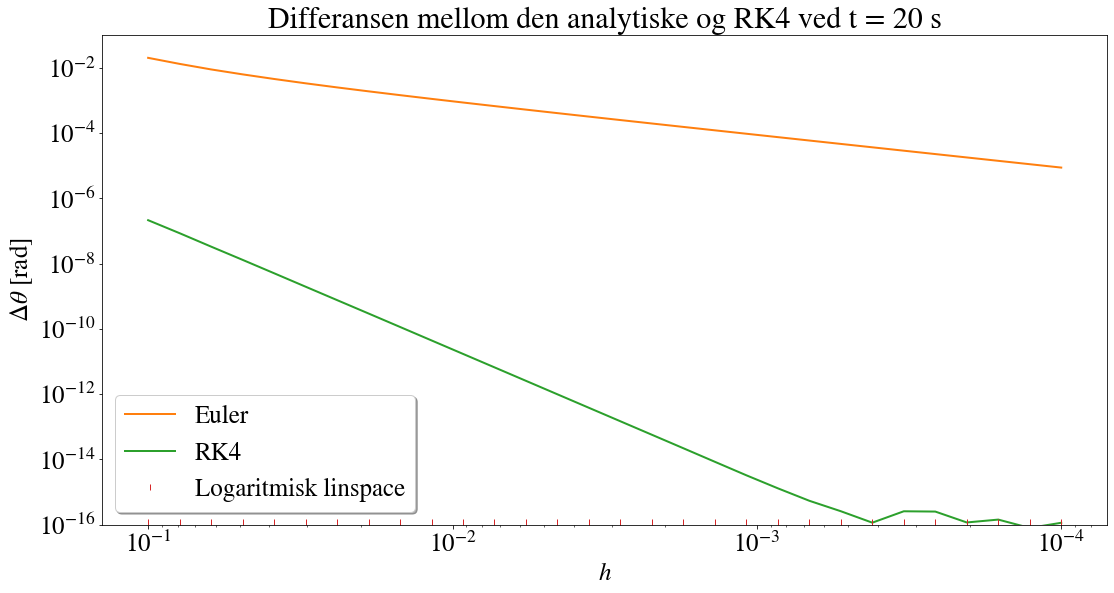

Estimated curve-fit polynomial for RK4: 0.0017*x^3.8855+-0.0000, so the estimated order is 3.89
Estimated curve-fit polynomial for Euler: 0.1159*x^1.0449+0.0000, so the estimated order is 1.04


In [20]:
#######################################################################################
#       Plot the differences
def plot_difference():
    
    diff_data = np.load('simulation_data/difference_at_t20.npz')
    h_steps, difference_euler, difference_rk4 = diff_data['h_steps'], diff_data['difference_euler'], diff_data['difference_rk4']

    plt.yscale("log")
    plt.xscale("log")
    #h_steps = np.logspace(-4,-1,30)#obs: hardcoding
    plt.plot(h_steps, np.zeros(len(h_steps)),linestyle='--') # Stiplet linje i 0
    plt.plot(h_steps, np.abs(difference_euler), label = "Euler")
    plt.plot(h_steps, np.abs(difference_rk4), label = "RK4")
    plt.plot(h_steps, np.repeat(12e-17,30),'|', label = "Logaritmisk linspace")
    

    plt.title("Differansen mellom den analytiske og RK4 ved t = 20 s")
    plt.xlabel('$h$')           
    plt.ylabel(r'$\Delta\theta$ [rad]')   
    plt.ylim(10e-17,0.1)        
    plt.legend(loc=3, shadow = True)
    plt.gca().invert_xaxis()#obs
    plt.show()
    def function(x, a, n,b):
        return a*x**n+b

    popt_rk4 , cov_rk4 = scipy.optimize.curve_fit(function, h_steps[0:23], np.abs(difference_rk4[0:23]))
    popt_euler , cov_euler = scipy.optimize.curve_fit(function, h_steps[10:30], np.abs(difference_euler[10:30]))
    

    a_rk4 ,n_rk4, b_rk4 = popt_rk4
    a_euler,n_euler,b_euler = popt_euler

    x_new_value = np.arange(min(h_steps), max(h_steps), 10000)
    y_new_value_rk4 = function(x_new_value, a_rk4,n_rk4, b_rk4)
    y_new_value_euler = function(x_new_value, a_euler,n_euler, b_euler)

    #plt.scatter(h_steps,np.abs(difference_rk4),color="blue",label = "Estimated curvefit")
    
    print(f'Estimated curve-fit polynomial for RK4: {a_rk4:.4f}*x^{n_rk4:.4f}+{b_rk4:.4f}, so the estimated order is {n_rk4:.2f}' )
    print(f'Estimated curve-fit polynomial for Euler: {a_euler:.4f}*x^{n_euler:.4f}+{b_euler:.4f}, so the estimated order is {n_euler:.2f}' )



plot_difference()
# def curvefit_rk4():
#     diff_data = np.load('simulation_data/difference_at_t20.npz')
#     h_steps, difference_euler, difference_rk4 = diff_data['h_steps'], diff_data['difference_euler'], diff_data['difference_rk4']
#     #To avoid the machine error affected part of the data
#     h_steps = h_steps[0:23]
#     difference_rk4 = difference_rk4[0:23] #Avoid the

#     def function(x, a, n):
#         return a*x**n
#     popt , cov = scipy.optimize.curve_fit(function, h_steps, np.abs(difference_rk4))
#     a ,n = popt

#     print(f'Estimated curve-fit polynomial for RK4: {a:.4f}*x^{n:.4f}' )
# curvefit_rk4()
# def curvefit_euler():
#     diff_data = np.load('simulation_data/difference_at_t20.npz')
#     h_steps, difference_euler, difference_rk4 = diff_data['h_steps'], diff_data['difference_euler'], diff_data['difference_rk4']
#     difference_euler = difference_euler[10:30]
#     h_steps= h_steps[10:30]

#     def function(x,a, n):
#         return a*x**n
#     popt , cov = scipy.optimize.curve_fit(function, h_steps, np.abs(difference_euler))
#     a,n = popt

#     print(f'Estimated curve-fit polynomial for Euler: {a:.4f}*x^{n:.4f}' )

# curvefit_euler()



In [21]:
print("Machine error: 0 = 7./3 - 4./3 - 1 = ",7./3 - 4./3 -1)

Machine error: 0 = 7./3 - 4./3 - 1 =  2.220446049250313e-16


In [22]:
# Class containing values and function related to the boat
class Boat_state:
    def __init__(self, m_L, m_boat, fences_bool, capsized_bool):
        self.m_L = m_L
        self.m_boat = m_boat
        self.fences = fences_bool
        self.capsized = capsized_bool
    def m_tot(self):
        return self.m_L + self.m_boat
    def beta(self):
        # return calculate_beta((np.pi*sigma*(R**2)+2*self.m_L)/(sigma_0*(R**2)), 5)
        return calculate_beta((2*(self.m_boat+self.m_L))/(sigma_0*(R**2)), 5)

In [23]:
class People:
    def __init__(self, m_p_0, omega_p):
        self.m_p_0 = m_p_0
        self.omega_p = omega_p  # NOTE: omega_p is in Hz
    def m_p(self, t):
        current_mass = self.m_p_0
        return current_mass
    def F_p(self, t):
        current_mass = self.m_p(t)
        return current_mass*g

In [24]:
omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
omega_w = 0.93*omega_0

In [25]:
def universal_func(
    w_start_vals, 
    t_end_input, 
    h_step_input, 
    F_0, 
    k_f, 
    omega_w_input, 
    m_boat_input, 
    m_L_input,
    fences_bool_input = False,
    ode_solver = solve_ODE,
    method = rk4_step,
    crowd = People(0, 0)
    ):
    '''
    Universell funksjon som kan benyttes til å beregne bevegelsen til skipet for mange ulike tilfelle.
    Gjennom hva man skriver i funksjonens argument kan man bla. simulere påvikningen friksjon, bølger og last.
    Inn:
        w_start_vals: s-array, inneholder alle startverdier 
            w_start_vals = [theta_0, omega_0, x_C_0, y_C_0, v_x_0, v_y_0, s_L_0, v_L_0]
        t_end_input: float, sluttid til simulasjonen
        h_step_input: float, steglengde til simulasjonen
        F_0: float, amplitiden til den harmoniske funksjonen som beskriver vind/bølger
        k_f: float, friksjonskoeffesient
        omega_w_input: float, vinkelfrekvensen til den harmoniske funksjonen som beskriver vind/bølger
        m_boat_input: float, massen til båten
        m_L_input: float, massen til lasten
        fences_bool: bool, if the boat will have fences or not, determines wether the load will fall of the ship
    Ut:
        t_num: array, tidsverdier
        w_num: array, w som inneholder alle beregnede verdier
    '''
    # Creating a boat-class
    boat = Boat_state(
        m_L_input, 
        m_boat, 
        fences_bool_input, 
        capsized_bool = False
        )
    
    
    # Equating the moment of intertia
    I_C = calculate_I_c(0, 0)
    
    def f(t, w):   
        '''
        Funksjon som brukes til å regne ut endringen til systemet.
        Inn:
            t: float, tid
            w: s-array, beskriver diverse av systemets fysiske egenskaper
        Ut:
            dw: endringen i w i det neste tidssteget
        
        '''   
        # Checks if the boat already has capsized
        if boat.capsized == True:
            w[0] = np.pi/2 * np.sign(w[0])
            w[1] = 0
            w[2] = 0
            w[3] = 0
            w[4] = 0
            w[5] = 0
            w[6] = 0
            w[7] = 0
        
        
        if np.abs(w[6]) > R and boat.m_L != 0 and boat.fences == False:
            boat.m_L = 0
            
        elif np.abs(w[6]) > R and boat.m_L != 0 and boat.fences == True:             
            if w[6] > 0:
                w[6] = R
            else:
                w[6] = -R
            w[7] = 0
        
        
        # Retrieving values from the boat-class
        m_boat_step = boat.m_boat
        m_L_step = boat.m_L
        # beta_step = boat.beta()
        m_tot_step = boat.m_tot() + crowd.m_p(t)
        beta_step = calculate_beta(
            np.pi*sigma/sigma_0 + 2*crowd.m_p(t)/( sigma_0 * R**2 ),
            2.4
        )        

        # Vertical displacement
        delta_y_C_step = w[3] - y_C_0(beta_step) 
        


        # if w[3] + h <= 0:
        #     print("Ubåt")

        if w[3] + h - R >= 0:
            # print("fly")
            gamma_step = 0
        else:
            # Sector-angle
            gamma_step = 2*np.arccos(np.cos(beta_step/2) - (4/(3*np.pi))*(1-np.cos(w[0])) + delta_y_C_step/R)
        
        # Checks if the boat capsizes
        if boat.capsized == False and w[0] > (0.5*(np.pi - gamma_step)):
            boat.capsized = True
            w[0] = np.pi/2 * np.sign(w[0])
            w[1] = 0
            w[2] = 0
            w[3] = 0
            w[4] = 0
            w[5] = 0
            w[6] = 0
            w[7] = 0
       
        # Repressed water
        A_step = water_area(gamma_step)
        
        # Gravitation and bouancy
        # F_G_step = F_G(m_boat)
        F_G_step = -F_G(m_boat_step)
        F_B_step = F_B(A_step)
        F_p_step = -crowd.F_p(t)
        
        # Friction and wind/waves
        F_w_step = F_0*np.cos(t*omega_w)
        F_f_step = friction(k_f, w[1], gamma_step)
        
        # The components of the contact-force between the load and the ship
        #F_L_x_step = m_L*g*np.cos(w[0])*np.sin(w[0])
        F_L_x_step = m_L_step*g*np.cos(w[0])*np.sin(w[0])
        #F_L_y_step = -m_L*g*(np.cos(w[0])**2)
        F_L_y_step = -m_L_step*g*(np.cos(w[0])**2)
 
        # Torque 
        tau_B_step = -F_B_step*h*np.sin(w[0])
        tau_f_step = F_f_step*(w[3] - (R*(np.cos(gamma_step/2)-1)))
        tau_w_step = F_w_step*w[3]
        #tau_L_step = -m_L*g*np.cos(w[0])*w[6]
        tau_L_step = -m_L_step*g*np.cos(w[0])*w[6]
        tau_p_step = crowd.F_p(t) * h*np.sin(w[0])
    
        # Equate values for the derivative of the w-vector, and combining them in an array
        d_theta = w[1]
        d_omega = (1/I_C)*(tau_B_step + tau_f_step + tau_w_step + tau_L_step + tau_p_step)
        d_x     = w[4]
        d_y     = w[5]
        d_v_x   = (1/(m_tot_step)) * (F_f_step + F_w_step + F_L_x_step)
        d_v_y   = (1/(m_tot_step)) * (F_G_step + F_B_step + F_L_y_step + F_p_step)
            
        d_s_L = w[7]
        d_v_L = -g*np.sin(w[0])
        
        dw = np.array([
            d_theta,
            d_omega,
            d_x,
            d_y,   
            d_v_x,  
            d_v_y, 
            d_s_L,
            d_v_L
        ])
        
        return dw

    # Initial values
    theta_0 = np.array([np.radians(w_start_vals[0])])
    omega_0 = np.array([w_start_vals[1]])
    x_C_0 = np.array([w_start_vals[2]])
    
    # Tenk ut en god løsning på dette. 
    beta_step = boat.beta() ###OBS OBS: ER DETTE RIKTIG? Mvh Matias :)
    initial_y_C = np.array( [y_C_0(beta_step) + w_start_vals[3]] )

            
    
    v_x_0 = np.array([w_start_vals[4]])
    v_y_0 = np.array([w_start_vals[5]])
    s_L_0 = np.array([w_start_vals[6]])
    v_L_0 = np.array([w_start_vals[7]])

    # Combining the initial values into an array
    w_0 = np.array([
        theta_0, 
        omega_0, 
        x_C_0, 
        initial_y_C, 
        v_x_0, 
        v_y_0, 
        s_L_0, 
        v_L_0
    ])

    # Running the solve_ODE-function
    t_0 = 0
    if ode_solver != solve_ODE:
        t_range = np.linspace(t_0, t_end_input, int( (t_end_input-t_0)/h_step_input + 1 ))
        w_0 = np.reshape(w_0, len(w_0))
        solution = ode_solver(f, (t_0, t_end_input), w_0, first_step = h_step_input, method=method, t_eval=t_range)
        w_num = solution.y
        t_num = solution.t
    else:
        t_num, w_num = ode_solver(f, (t_0, t_end_input), w_0, first_step = h_step_input, method=method)
        
    # w_num = check_capsizing(w_num)
    return t_num, w_num

In [26]:
#def oppg_2b_solve():
#    w_start_vals = [20, 0, 0, 0, 0, 0, 0, 0]

#    F_0 = 0
#    k_f = 0
#    t_end = 200
#    h_step = 0.01

#    m_boat = A_s*sigma
#    m_L = 0*m_boat

#    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
#    omega_w = 0.93*omega_0

    # m_boat = A_s*sigma
    # m_L = 0*m_boat
    
#    t_num, w_num = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L)
    #print(np.min(w_num[3]) + (np.max(w_num[3])-np.min(w_num[3]))/2)
#    np.savez(
#        'simulation_data/2b',
#        t_num = t_num,
#        w_num = w_num
        
#        )

#    beta = calculate_beta(np.pi*sigma/sigma_0,5)
#    y_num = w_num[3]
#    plot_func(t_num, [y_num], [f"$h = 0.01$"], "Massesenters høyde som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]',[y_C_0(beta), np.min(w_num[3]) + (np.max(w_num[3])-np.min(w_num[3]))/2])
#    plot_func(t_num, [w_num[0]], [f"$h = 0.01$"], "Vinkelutslaget som funksjon av tid", '$t$ [s]', r'Vinkelutslag, $\theta$ [m]')

#oppg_2b_solve()


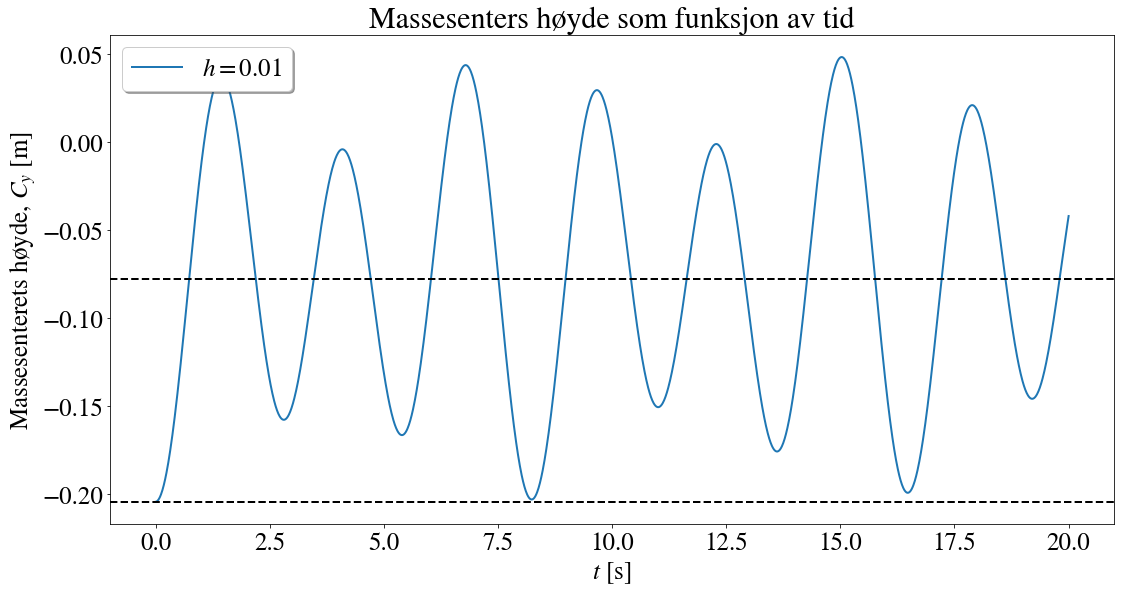

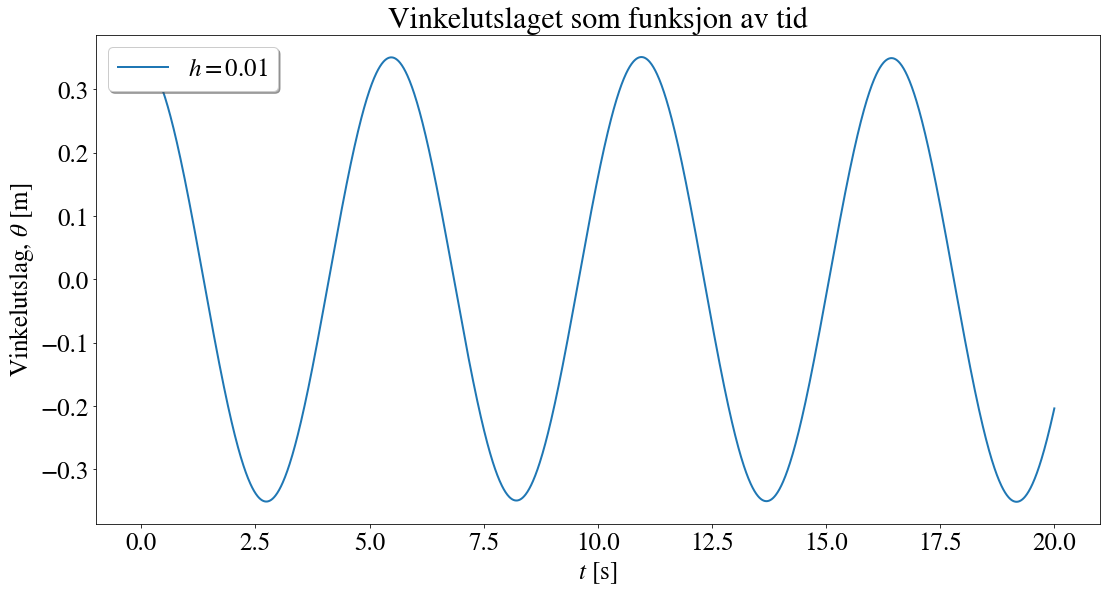

In [27]:
def oppg_2b_solve():
    w_start_vals = [20, 0, 0, 0, 0, 0, 0, 0]

    F_0 = 0
    k_f = 0
    t_end = 20
    h_step = 0.01

    m_boat = A_s*sigma
    m_L = 0*m_boat

    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0.93*omega_0

    # m_boat = A_s*sigma
    # m_L = 0*m_boat
    
    t_num, w_num = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L)
    #print(np.min(w_num[3]) + (np.max(w_num[3])-np.min(w_num[3]))/2)
    np.savez(
        'simulation_data/2b',
        t_num = t_num,
        w_num = w_num
        
        )

    beta = calculate_beta(np.pi*sigma/sigma_0,5)
    y_num = w_num[3]
    plot_func(t_num, [y_num], [f"$h = 0.01$"], "Massesenters høyde som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]',[y_C_0(beta), np.min(w_num[3]) + (np.max(w_num[3])-np.min(w_num[3]))/2])
    plot_func(t_num, [w_num[0]], [f"$h = 0.01$"], "Vinkelutslaget som funksjon av tid", '$t$ [s]', r'Vinkelutslag, $\theta$ [m]')
    
oppg_2b_solve()

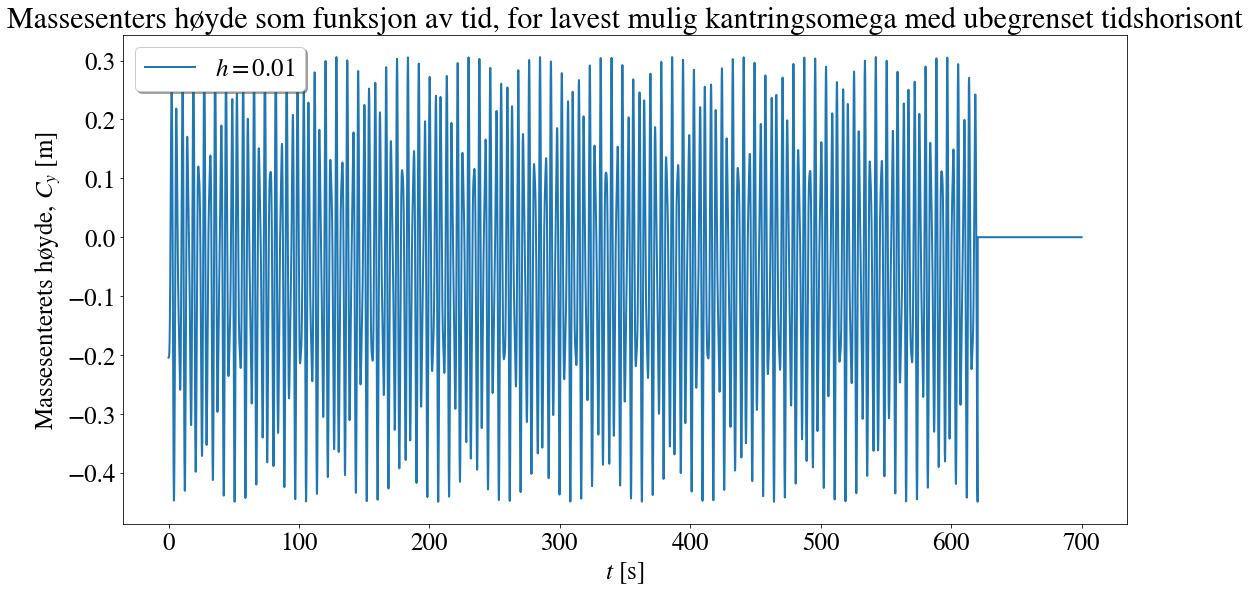

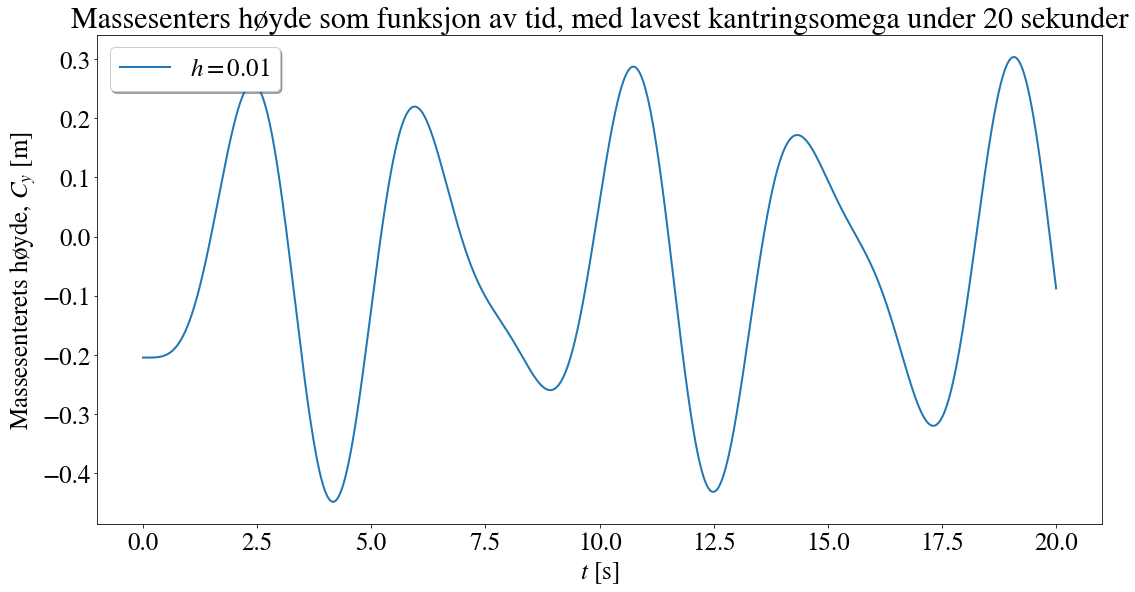

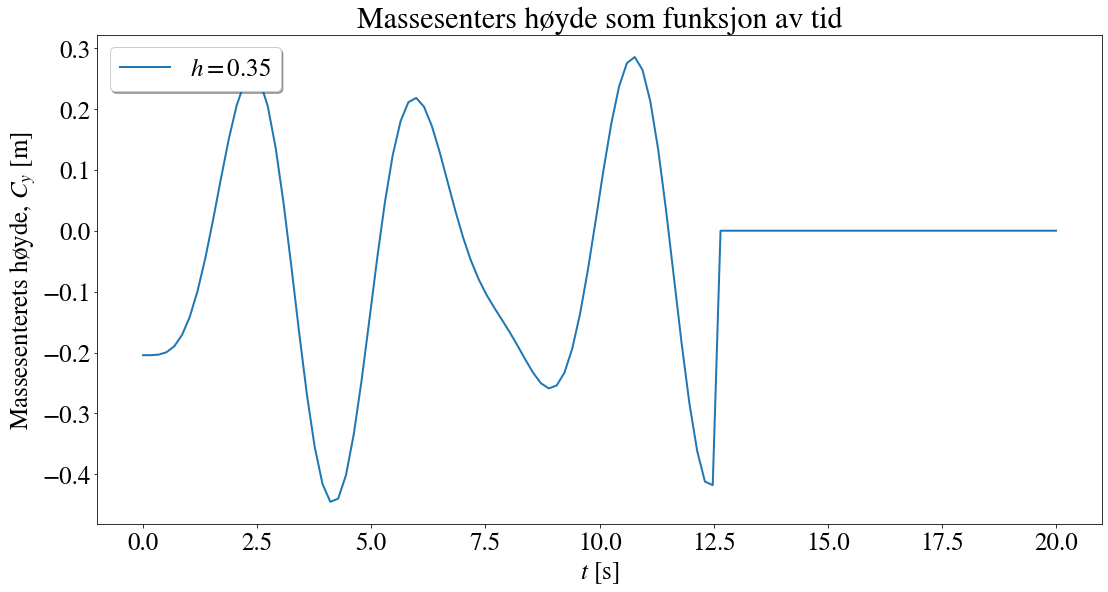

In [28]:
#omega_lowest = 0.4335
#omega_lowest = 0.432

def lowest_omega():

    F_0 = 0
    k_f = 0
    t_end = 700
    h_step = 0.01
    m_boat = A_s*sigma
    m_L = 0*m_boat
    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0.93*omega_0
    
    #Inefficient brute to find the lowest omega value
    def find_omega_lowest():
        def capsize_check(theta_arr):
            return np.pi/2 in np.abs(theta_arr)
        omega_candidates,step = np.linspace(0.42,0.44,10,retstep=True)
        for omega in omega_candidates:
            w_start_vals = [0, omega, 0, 0, 0, 0, 0, 0]
            t_num, w_num = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L)  
            previous_omega = 0
            if capsize_check(w_num[0]):
                previous_omega = omega-step
            else:
                
                return omega
    #lowest_omega = find_omega_lowest()
    lowest_omega = 0.43142342342342344
    w_start_vals = [0, lowest_omega, 0, 0, 0, 0, 0, 0]
    t_num, w_num = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L) 
    
    
    

    np.savez(
            'simulation_data/2c',
            t_num = t_num,
            w_num = w_num
            
            )
    y_num = w_num[3]
    plot_func(t_num, [y_num], [f"$h = 0.01$"], "Massesenters høyde som funksjon av tid, for lavest mulig kantringsomega med ubegrenset tidshorisont", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]')
lowest_omega()
def lowest_omega_20seconds():
    F_0 = 0
    k_f = 0
    t_end = 20
    h_step = 0.01
    m_boat = A_s*sigma
    m_L = 0*m_boat
    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0.93*omega_0
    lowest_omega = 0.432
    w_start_vals = [0, lowest_omega, 0, 0, 0, 0, 0, 0]
    t_num, w_num = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L)
    plot_func(t_num, [w_num[3]], [f"$h = 0.01$"], "Massesenters høyde som funksjon av tid, med lavest kantringsomega under 20 sekunder", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]')
 
lowest_omega_20seconds()

def rk4_big_step_example():
    F_0 = 0
    k_f = 0
    t_end = 20
    h_step = 0.17 #Very large
    m_boat = A_s*sigma
    m_L = 0*m_boat
    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0.93*omega_0
    lowest_omega = 0.43142342342342344
    w_start_vals = [0, lowest_omega, 0, 0, 0, 0, 0, 0]
    t_num, w_num = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L)
    plot_func(t_num, [w_num[3]], [f"$h = 0.35$"], "Massesenters høyde som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]')
rk4_big_step_example()

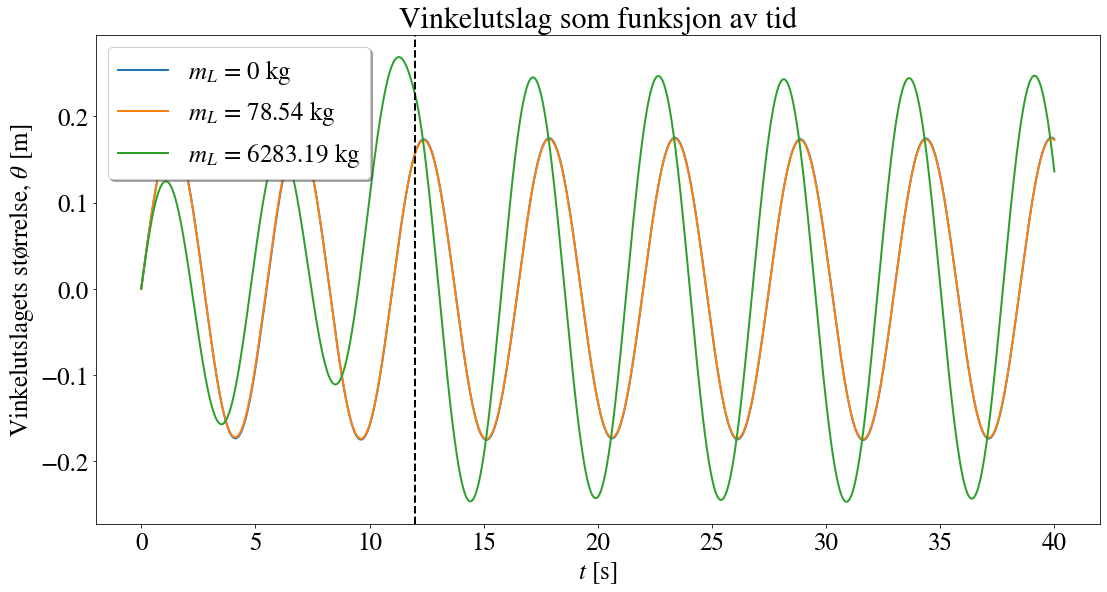

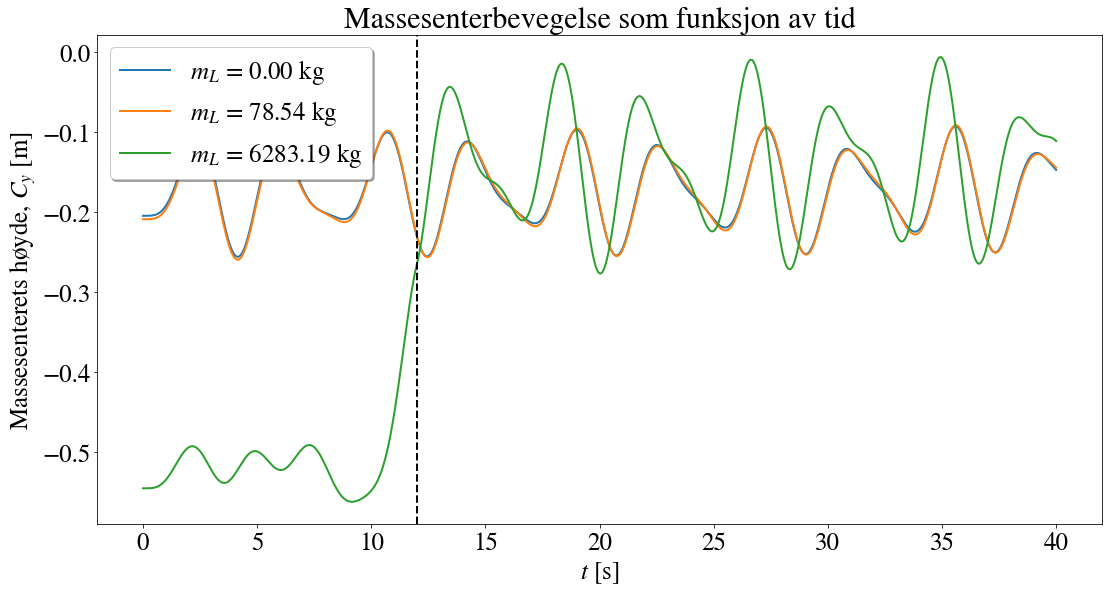

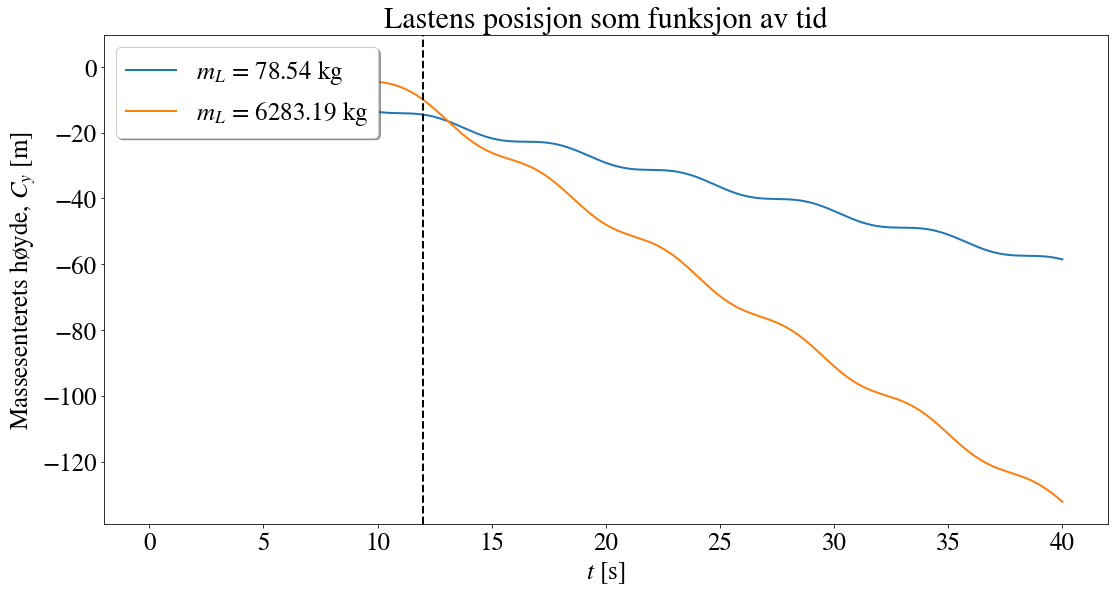

In [29]:
w_start_vals = [0, 0.2, 0, 0, 0, 0, 3, 0]

F_0 = 0
k_f = 0
t_end = 40
h_step = 0.01

omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
omega_w = 0.93*omega_0

m_boat = A_s*sigma
m_L_1 = 0.001*m_boat
m_L_2 = 0.08*m_boat

t_num_0, w_num_0 = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, 0, False)#null last
t_num_1, w_num_1 = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L_1, False)#liten last
t_num_2, w_num_2 = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L_2, False)#stor last
np.savez(
        'simulation_data/2d',
        t_num_2 = t_num_2,
        w_num_2 = w_num_2
        )
theta_num_0 = w_num_0[0]
theta_num_1 = w_num_1[0]
theta_num_2 = w_num_2[0]
y_num_0 = w_num_0[3]
y_num_1 = w_num_1[3]
y_num_2 = w_num_2[3]
s_L_num_1 = w_num_1[6]
s_L_num_2 = w_num_2[6]
plot_func(t_num_1, [theta_num_0,theta_num_1, theta_num_2], [f"$m_L$ = {0} kg",f"$m_L$ = {m_L_1:.2f} kg", f"$m_L$ = {m_L_2:.2f} kg"], "Vinkelutslag som funksjon av tid", '$t$ [s]', r'Vinkelutslagets størrelse, $\theta$ [m]',vertical_lines=[12])
plot_func(t_num_1, [y_num_0,y_num_1, y_num_2], [f"$m_L$ = {0:.2f} kg",f"$m_L$ = {m_L_1:.2f} kg", f"$m_L$ = {m_L_2:.2f} kg"], "Massesenterbevegelse som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]',vertical_lines=[12])
plot_func(t_num_1, [s_L_num_1, s_L_num_2], [f"$m_L$ = {m_L_1:.2f} kg", f"$m_L$ = {m_L_2:.2f} kg"], "Lastens posisjon som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]',vertical_lines=[12])

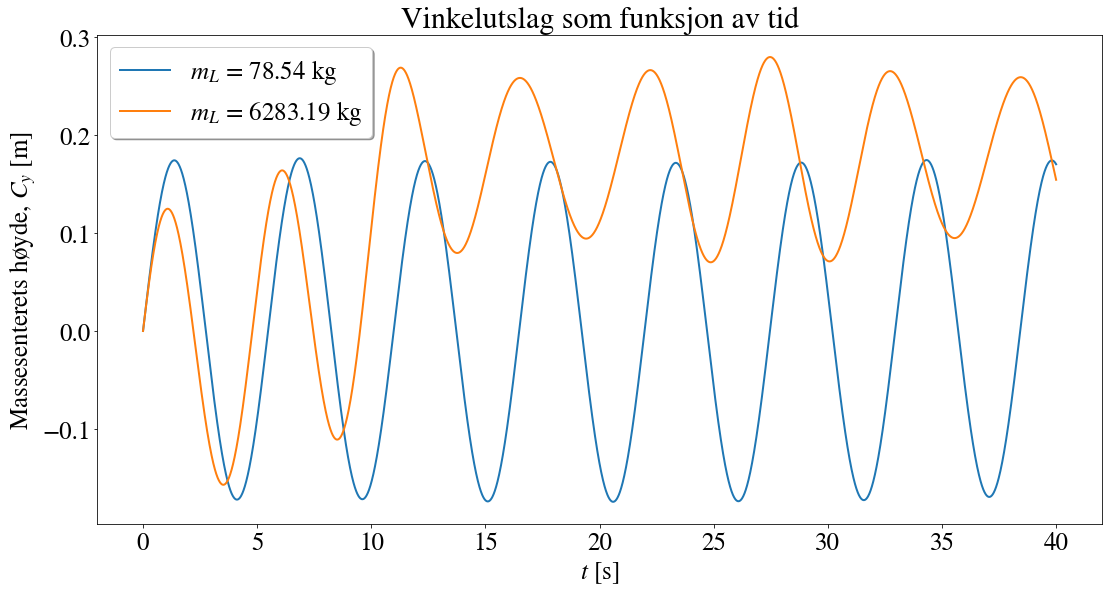

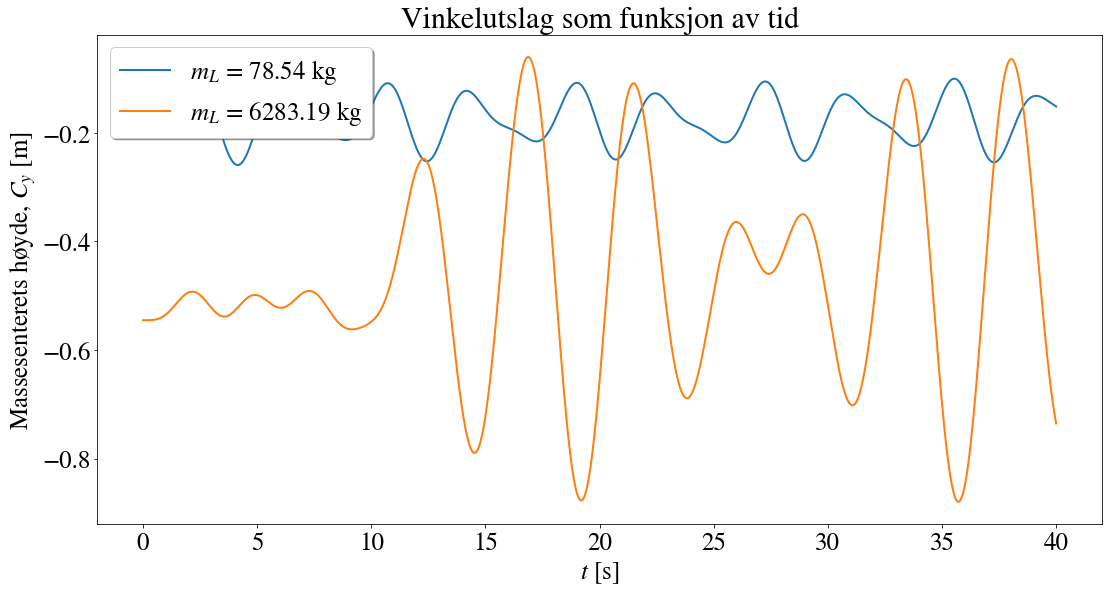

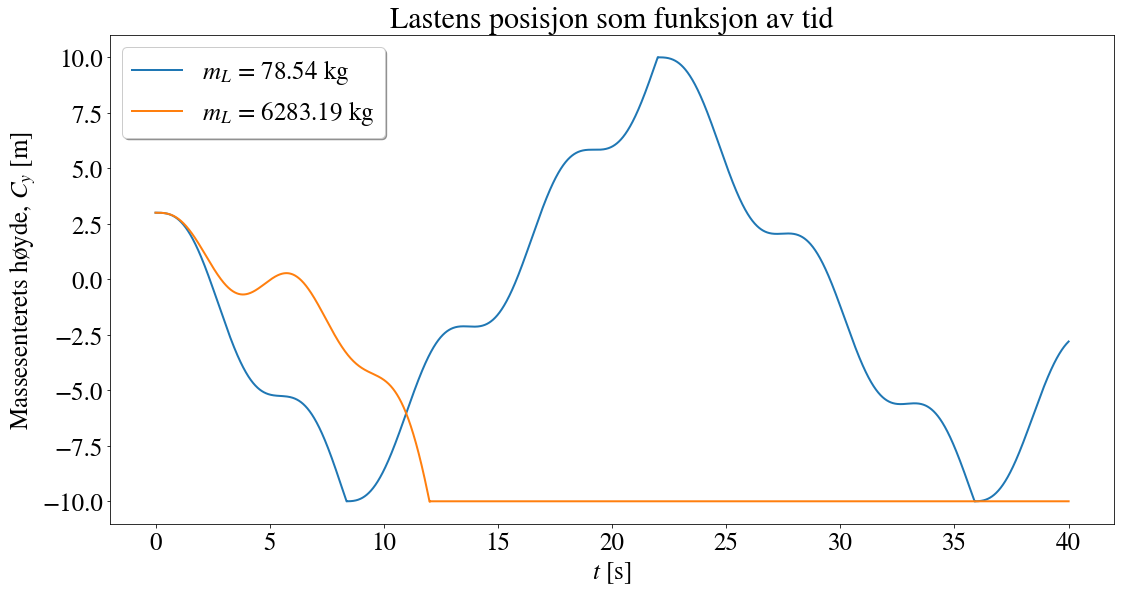

In [30]:
w_start_vals = [0, 0.2, 0, 0, 0, 0, 3, 0]

F_0 = 0
k_f = 0
t_end = 40
h_step = 0.01

omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
omega_w = 0.93*omega_0

m_boat = A_s*sigma
m_L_1 = 0.001*m_boat
m_L_2 = 0.08*m_boat

t_num_1, w_num_1 = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L_1, True)
t_num_2, w_num_2 = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L_2, True)
boat_info = [m_boat, m_L_2]
np.savez(
        'simulation_data/2e',
        t_num_2 = t_num_2,
        w_num_2 = w_num_2,
        boat_info = boat_info
        )
theta_num_1 = w_num_1[0]
theta_num_2 = w_num_2[0]
s_L_num_1 = w_num_1[6]
s_L_num_2 = w_num_2[6]

plot_func(t_num_1, [theta_num_1, theta_num_2], [f"$m_L$ = {m_L_1:.2f} kg", f"$m_L$ = {m_L_2:.2f} kg"], "Vinkelutslag som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]')
plot_func(t_num_1, [w_num_1[3], w_num_2[3]], [f"$m_L$ = {m_L_1:.2f} kg", f"$m_L$ = {m_L_2:.2f} kg"], "Vinkelutslag som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]')
plot_func(t_num_1, [s_L_num_1, s_L_num_2], [f"$m_L$ = {m_L_1:.2f} kg", f"$m_L$ = {m_L_2:.2f} kg"], "Lastens posisjon som funksjon av tid", '$t$ [s]', r'Massesenterets høyde, $C_y$ [m]')

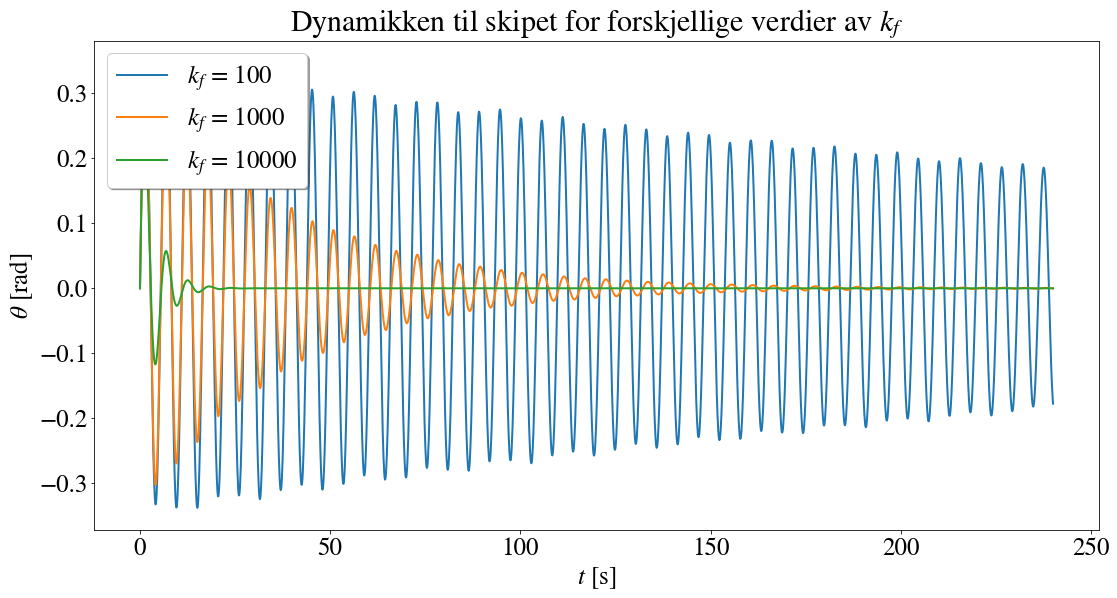

In [31]:
w_start_vals = [0, 0.4, 0, 0, 0, 0, 0, 0]

F_0 = 0
t_end = 240
h_step = 0.1

omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
omega_w = 0.93*omega_0

k_f_1 = 100
k_f_2 = 1000
k_f_3 = 10000

k_f_vals = [k_f_1, k_f_2, k_f_3]

m_boat = A_s*sigma
m_L = 0

t_vals = []
w_vals = []
theta_vals = []

for i in range(len(k_f_vals)):
    t_num_temp, w_num_temp = universal_func(w_start_vals, t_end, h_step, F_0, k_f_vals[i], omega_w, m_boat, m_L) 
    
    t_vals.append(t_num_temp)
    w_vals.append(w_num_temp)
    theta_vals.append(w_num_temp[0])
    
labels = []
for k_f_val in k_f_vals:
    labels.append(f"$k_f$ = {k_f_val}")
    
plot_func(t_vals[0], theta_vals, labels, f"Dynamikken til skipet for forskjellige verdier av $k_f$", "$t$ [s]", r"$\theta$ [rad]")

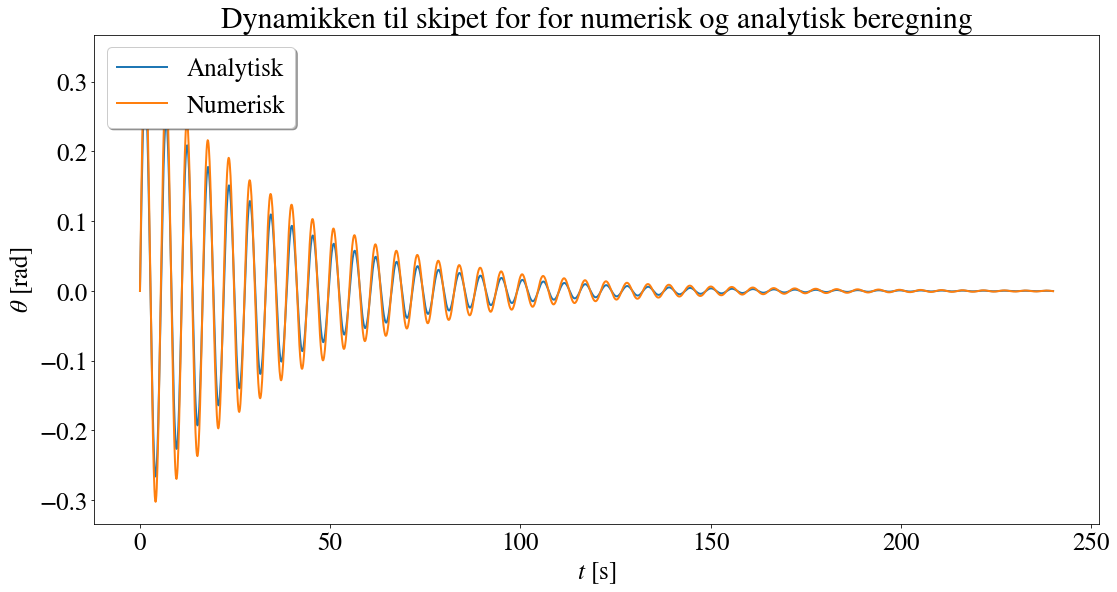

In [32]:
k_f_val = 1000

anal_theta_0 = 0
# Determining anal_theta_0
for i in range(1000):
    if theta_vals[1][i] > anal_theta_0:
        anal_theta_0 = theta_vals[1][i]

anal_beta = calculate_beta(0, 0)
anal_gamma = gamma(anal_beta, anal_theta_0, 0)
# anal_delta = (k_f_val*anal_gamma)/m_boat
anal_delta = (k_f_val)/(m_boat*anal_gamma)
omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
anal_omega = np.sqrt(omega_0**2 - anal_delta**2)
#anal_omega = np.sqrt((0.4)**2 - anal_delta**2)

anal_t_vals = np.linspace(0, 240, len(theta_vals[1]))
anal_theta = 0.3*np.exp(-anal_delta*anal_t_vals)*np.sin(anal_omega*anal_t_vals)

plot_func(t_vals[0], [anal_theta, theta_vals[1]], ["Analytisk", "Numerisk"], f"Dynamikken til skipet for for numerisk og analytisk beregning", "$t$ [s]", r"$\theta$ [rad]") 

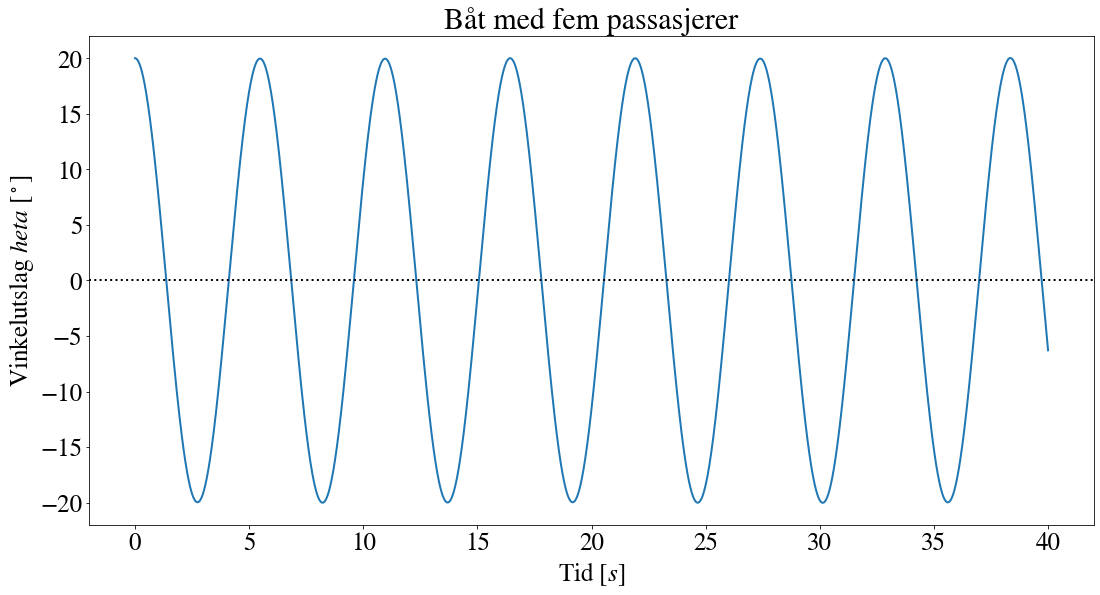

In [45]:
def people_on_boat():
    m_p = 400 # [kg]
    passangers = People(m_p, 0)


    ######################################
    #   This block is repetetive
    w_start_vals = [
        20,  # theta [deg]
        0,  # omega [rad/s]
        0,  # x [m]
        0,  # y [m]
        0,  # v_x [m/s]
        0,  # v_y [m/s]
        0,  # s_L [m]
        0   # v_L [m/s]
        ]

    F_0 = 1000         # Force of wave
    k_f = 0         # Friction coefficient
    t_end = 40      # End time
    h_step = 0.01   # Time step


    m_boat = A_s*sigma
    m_L = 0

    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0.8*omega_0

    t, w = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L, fences_bool_input=True, crowd=passangers)
    # print(f't: {t}\nw: {w}')
    y_pos = w[3]

    plt.plot(
        t,
        np.rad2deg(w[0]),
        # 'o'
    )
    # plt.ylim(-2.5,2.5)
    plt.ylabel('Vinkelutslag $\theta$ [$^\circ$]')
    plt.xlabel('Tid [$s$]')

    plt.title("Båt med fem passasjerer")
    plt.axhline(0, color="black", linestyle="dotted")
    plt.show()
people_on_boat()

In [34]:
class People:
    def __init__(self, m_p_0, omega_p):
        self.m_p_0 = m_p_0
        self.omega_p = omega_p  # NOTE: omega_p is in Hz
    def m_p(self, t):
        current_mass = ( 
            0.5 + 0.5*signal.square(t*self.omega_p*2*np.pi) 
            ) * 2*self.m_p_0*(
            1 - (2/3)*np.sin(t*self.omega_p*2*np.pi)
            )
        #old: current_mass = m_p_0
        return current_mass
    def F_p(self, t):
        current_mass = self.m_p(t)
        return g*current_mass

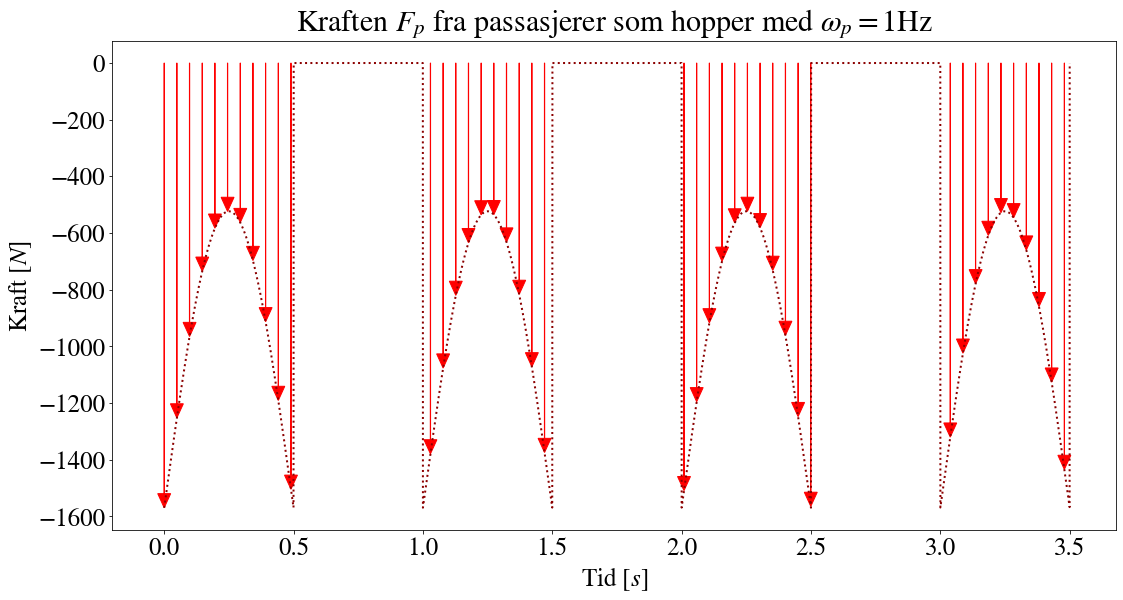

In [35]:
def plot_m_p():
    person = People(80, 1)
    t = np.linspace(0, 3.5, 10000)
    F_p = -person.F_p(t)

    step = 100
    for i in range(0, len(t), 140):
        plt.arrow(
            t[i], 
            0,
            0, 
            F_p[i],
            color = 'red',
            length_includes_head = True,
            head_width = 0.05,
            head_length = 50
        )

    plt.plot(
        t,
        F_p,
        linestyle = 'dotted',
        color = 'darkred',
    )
    plt.xlabel("Tid [$s$]")
    plt.ylabel("Kraft [$N$]")
    plt.title("Kraften $F_p$ fra passasjerer som hopper med $\omega_p=1$Hz")

    plt.show()
plot_m_p()

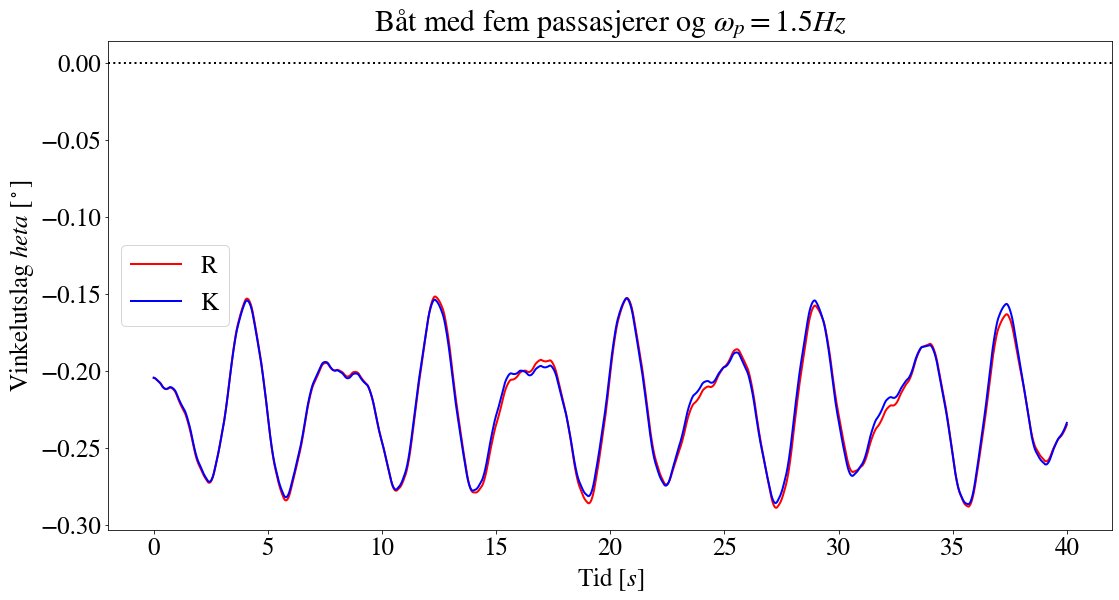

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [78]:
def jumping_people():
    m_p = 20*80 # [kg]
    passangers = People(m_p, 1.5)
    #passangers = People(0, 0)


    ####################################################
    #   This block is repetetive
    w_start_vals = [
        10,  # theta [deg]
        0,  # omega [rad/s]
        0,  # x [m]
        0,  # y [m]
        0,  # v_x [m/s]
        0,  # v_y [m/s]
        0,  # s_L [m]
        0   # v_L [m/s]
        ]

    F_0 = 0         # Force of wave
    k_f = 0         # Friction coefficient
    t_end = 40      # End time
    h_step = 0.01   # Time step


    m_boat = A_s*sigma
    m_L = 0

    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0*omega_0
    ######################################################
    #       Calculate t and w using the different methods
    t_rk4, w_rk4 = universal_func(
        w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L, fences_bool_input=True, crowd=passangers, 
        ode_solver=solve_ODE, method=rk4_step
    )
    t_bdf, w_bdf = universal_func(
        w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L, fences_bool_input=True, crowd=passangers, 
        ode_solver=integrate.solve_ivp, method='BDF'
    )
    ######################################################
    #       Plot the results
    plt.plot(
        t_bdf,
        w_bdf[3],
        color = 'red'
        # 'o'
    )
    plt.legend("BDF")

    plt.plot(
        t_rk4,
        w_rk4[3],
        color = "blue"
    )
    plt.legend("RK4")
    
    # plt.ylim(-2.5,2.5)
    plt.ylabel('Vinkelutslag $\theta$ [$^\circ$]')
    plt.xlabel('Tid [$s$]')

    plt.title("Båt med fem passasjerer og $\omega_p=1.5Hz$")
    plt.axhline(0, color="black", linestyle="dotted")
    plt.show()

    ######################################################
    #       Save the data for further calculations
    boat_information = [
        w_start_vals,
        m_boat,
        passangers,

    ]
    np.savez(
        'simulation_data/jumping_people',
        t_rk4 = t_rk4,
        w_rk4 = w_rk4,
        t_bdf = t_bdf,
        w_bdf = w_bdf,
        boat_information = boat_information
    )

    
jumping_people()

In [37]:
y_equalibrium = lambda y_arr: (np.max(y_arr) - np.min(y_arr))/2 + np.min(y_arr)

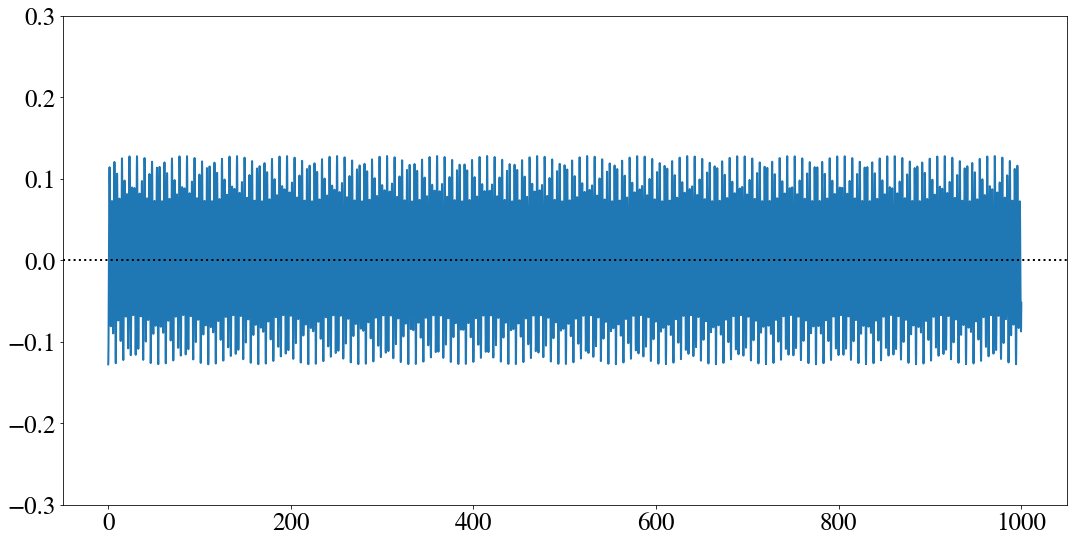

In [82]:
def generate_sim_data():
    w_start_vals = [
        20,  # theta
        0,  # omega
        0,  # x
        0,  # y
        0,  # v_x
        0,  # v_y
        0,  # s_L
        0   # v_L
        ]

    m_boat = A_s*sigma
    F_0 = 0   # Force of wave
    k_f = 0         # Friction coefficient
    t_end = 1000      # End time

    h_step = 0.05   # Time step


    m_L = 0.00*m_boat

    m_p_0 = 0
    omega_p = 0
    party_people = People(m_p_0, omega_p)
    # party_people = People(0, 0)




    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0*omega_0

    t, w = universal_func(w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L, fences_bool_input=True, crowd=party_people)
    y_pos = w[3] - y_equalibrium(w[3])


    plt.plot(
        t,
        y_pos,
        # 'o'
    )
    plt.ylim(-0.3,0.3)

    plt.axhline(0, color="black", linestyle="dotted")
    plt.show()


    boat_info = [
        m_boat,
        m_L
    ]

    fname = 'theta_20'
    np.savez(
        'fourier_data/'+fname,
        t=t,
        y_pos = y_pos,
        w = w,
        boat_info = boat_info
    )
generate_sim_data()


In [62]:
def fourier_trans():
    '''
    This function takes in an array and does a discrete fourier transform on the array. Then 
    it saves the result to a file with given file-name
    Input:
        in_fname: string, the file name where the data is to be loaded from
        arr_name: string, the array within 'in_fname' that is to be transformed
        f_name: string, name of the file that the data is to be saved to
    Output:
        The function does not output anything directly, but saves the following 
        to a file with the given file name 'out_fname':
            X: N/2-array (float), the amplitude normalized fft of x
            freqs: N/2-array(float), the frequencies correspondig to X 
    '''
    dir_name = 'fourier_data/' # Name of the directory where data is stored
    in_fname = 'theta_20'

    #   Extract the simulation data
    sim_data = np.load(dir_name + in_fname + '.npz')
    y = sim_data['y_pos']
    t = sim_data['t']

    #   Find the (fast) fourier transform
    N = len(y)
    timestep = (t[-1] - t[0])/N

    y_fft = fft(y)#[N//2:]   # We are only interrested in the positive part of the frequencies
    Y = 2/N * np.abs(y_fft) # Normalize the transform

    freqs = fftfreq(N, timestep)#[N//2:]

    #   Save the data to file
    np.savez(
        dir_name + in_fname + '_fft',
        Y = Y,
        freqs = freqs
    )
fourier_trans()

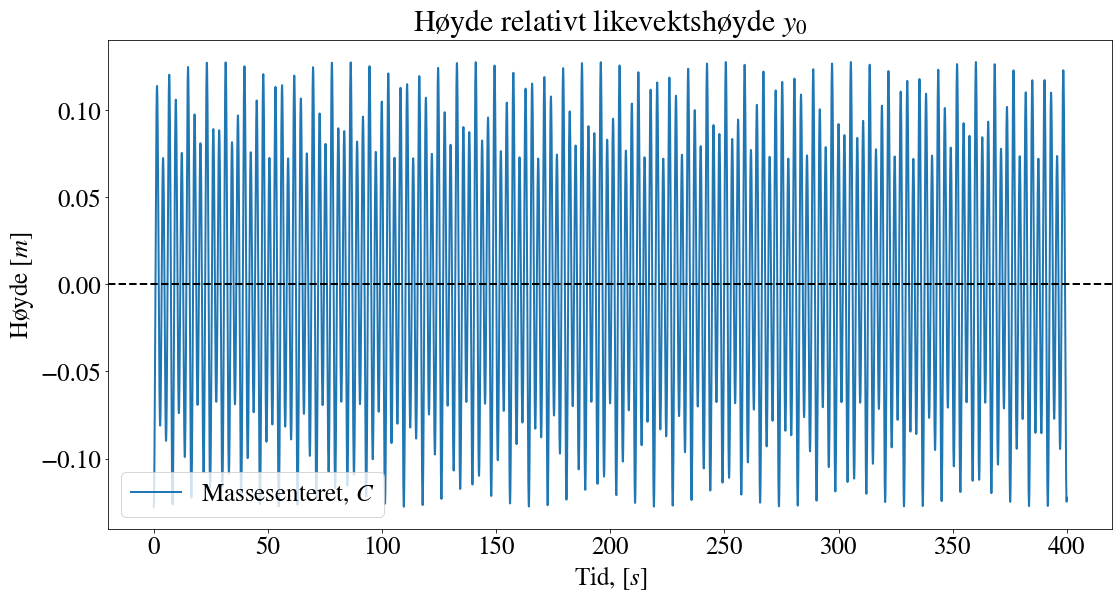

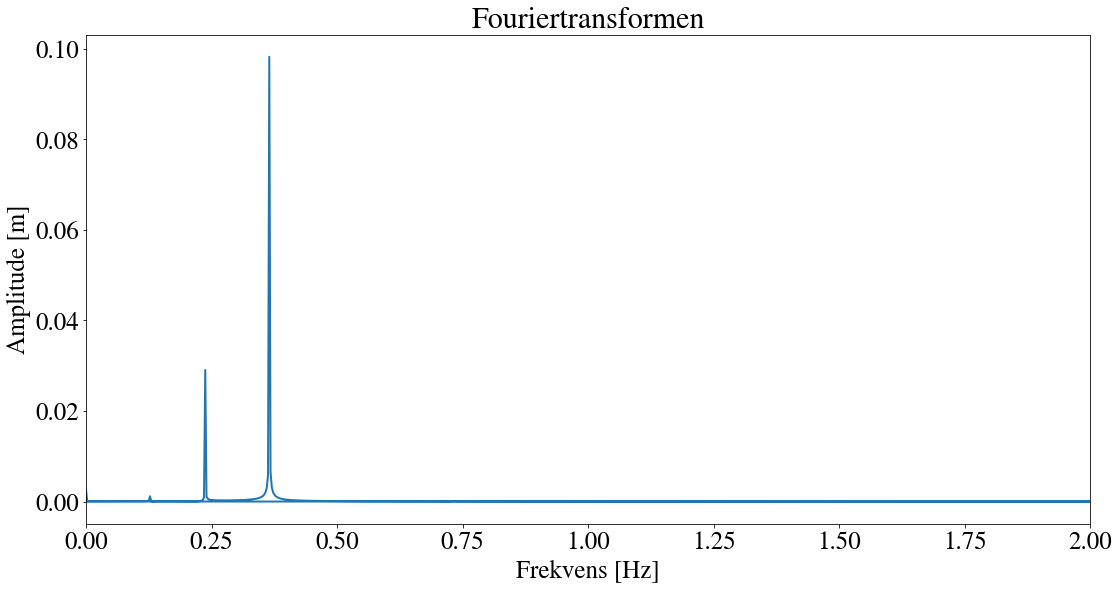

In [63]:
def fourier_plot():
    #   Extract the simulation data, and define relevant sizes
    dir_name = 'fourier_data/'
    sim_data = np.load(dir_name + 'theta_20' + '.npz')
    # print(sim_data.files)

    t, y_pos, w = sim_data['t'], sim_data['y_pos'], sim_data['w']

    # beta = calculate_beta(( 2*(boat_info[0]+boat_info[1]) )/( sigma_0*(R**2) ), 5)
    # y_pos = y_pos-y_equalibrium(y_pos)
    
    #####################################################################################
    #           Plot the initial system
    plt.plot(
        t, 
        y_pos,
        label = 'Massesenteret, $C$'
    )
    # plt.ylim(-1, 1)

    plt.axhline(0, color='black', linestyle='--')
    
    plt.title('Høyde relativt likevektshøyde $y_0$')
    plt.xlabel('Tid, [$s$]')
    plt.ylabel('Høyde [$m$]')
    plt.legend()
    plt.show()
    
    #####################################################################################
    #           Find the fft of said system and plot it in the frequency space
    fourier_data = np.load(dir_name + 'theta_20_fft' + '.npz')
    Y, freqs = fourier_data['Y'], fourier_data['freqs']
    plt.plot(
        freqs,
        Y,
        label = "Fouriertransformen av skipet med $\theta_0 = 20 ^\circ$"
        # width= 5/len(Y)
    )
    plt.xlabel("Frekvens [Hz]")
    plt.ylabel("Amplitude [m]")
    plt.xlim(0, 2)
    plt.title("Fouriertransformen")
    plt.show()
    # res_freq_index = np.argmax(Y)
    # print(f'Resonant frequency: {freqs[res_freq_index]}')
fourier_plot()

In [41]:
def find_freqs():
    fourier_data = np.load('fourier_data/theta_20_fft' + '.npz')
    Y, freqs = fourier_data['Y'], fourier_data['freqs']


    max_freq_index = signal.argrelextrema(Y, np.greater)
    max_freqs = np.argwhere(freqs[max_freq_index] > 0.02)

    print(freqs[max_freqs])
find_freqs()

[[0.01]
 [0.02]
 [0.03]
 [0.04]
 [0.05]
 [0.06]
 [0.07]
 [0.08]
 [0.09]
 [0.1 ]
 [0.11]
 [0.12]
 [0.13]
 [0.14]
 [0.15]
 [0.16]
 [0.17]
 [0.18]
 [0.19]
 [0.2 ]
 [0.21]
 [0.22]
 [0.23]
 [0.24]
 [0.25]
 [0.26]
 [0.27]
 [0.28]
 [0.29]
 [0.3 ]
 [0.31]
 [0.32]
 [0.33]
 [0.34]
 [0.35]
 [0.36]
 [0.37]
 [0.38]
 [0.39]
 [0.4 ]
 [0.41]
 [0.42]
 [0.43]
 [0.44]
 [0.45]
 [0.46]
 [0.47]
 [0.48]
 [0.49]
 [0.5 ]
 [0.51]
 [0.52]
 [0.53]
 [0.54]
 [0.55]
 [0.56]
 [0.57]
 [0.58]
 [0.59]
 [0.6 ]
 [0.61]
 [0.62]
 [0.63]
 [0.64]
 [0.65]
 [0.66]
 [0.67]
 [0.68]
 [0.69]
 [0.7 ]
 [0.71]
 [0.72]
 [0.73]
 [0.74]
 [0.75]
 [0.76]
 [0.77]
 [0.78]
 [0.79]
 [0.8 ]
 [0.81]
 [0.82]
 [0.83]
 [0.84]
 [0.85]
 [0.86]
 [0.87]
 [0.88]
 [0.89]
 [0.9 ]
 [0.91]
 [0.92]
 [0.93]
 [0.94]
 [0.95]
 [0.96]
 [0.97]
 [0.98]
 [0.99]
 [1.  ]
 [1.01]
 [1.02]
 [1.03]
 [1.04]
 [1.05]
 [1.06]
 [1.07]
 [1.08]
 [1.09]
 [1.1 ]
 [1.11]
 [1.12]
 [1.13]
 [1.14]
 [1.15]
 [1.16]
 [1.17]
 [1.18]
 [1.19]
 [1.2 ]
 [1.21]
 [1.22]
 [1.23]
 [1.24]
 [1.25]


Last t in BDF: 300.0, length of t-array: 30001
Last t in rk4: 300.0, length of t-array: 30001


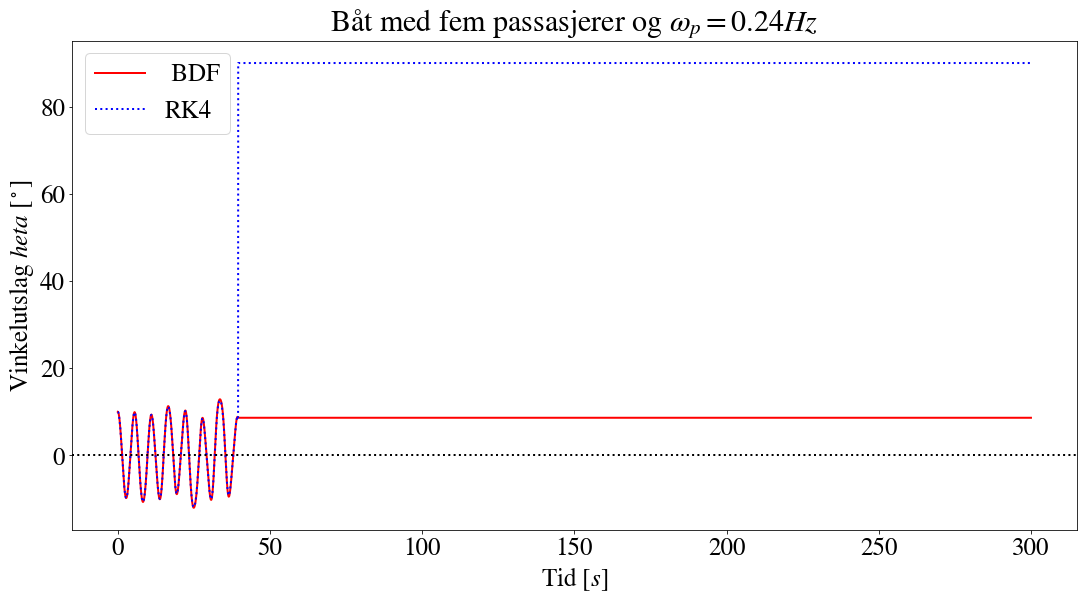

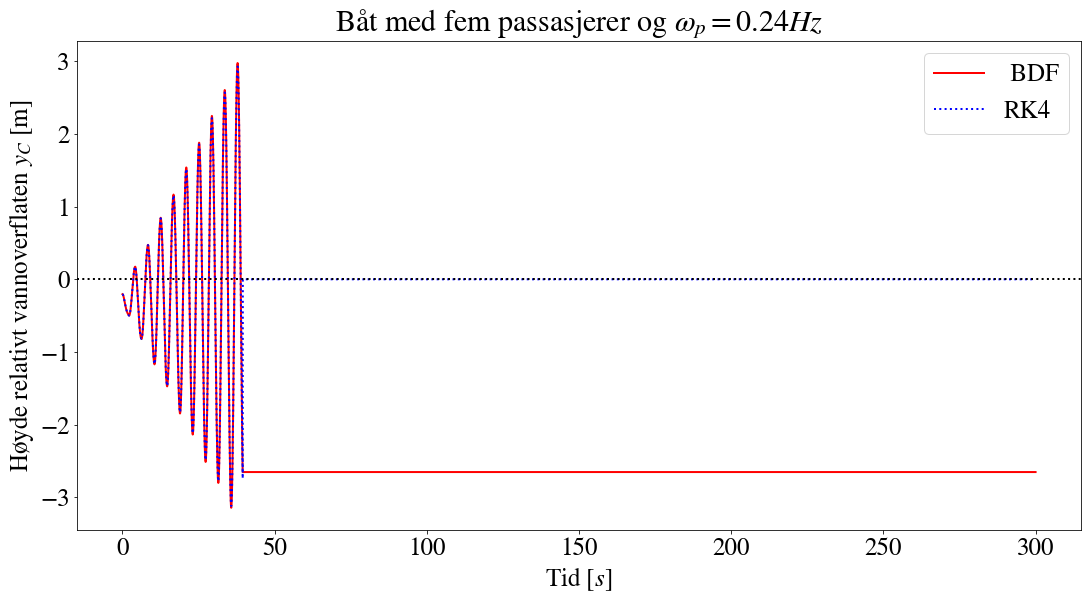

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Last t in BDF: 300.0, length of t-array: 30001
Last t in rk4: 300.0, length of t-array: 30001


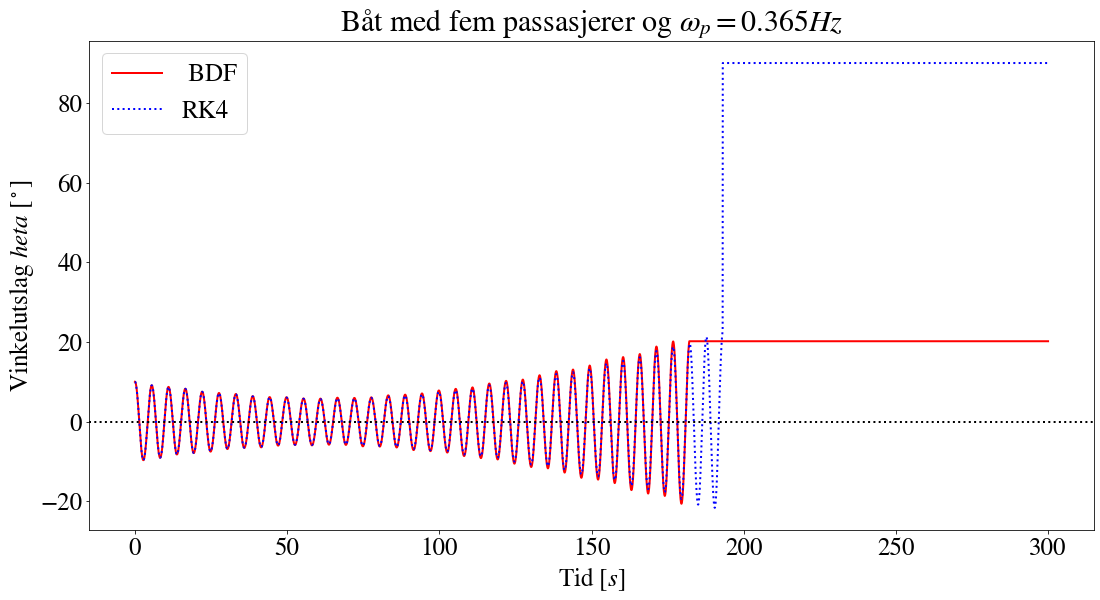

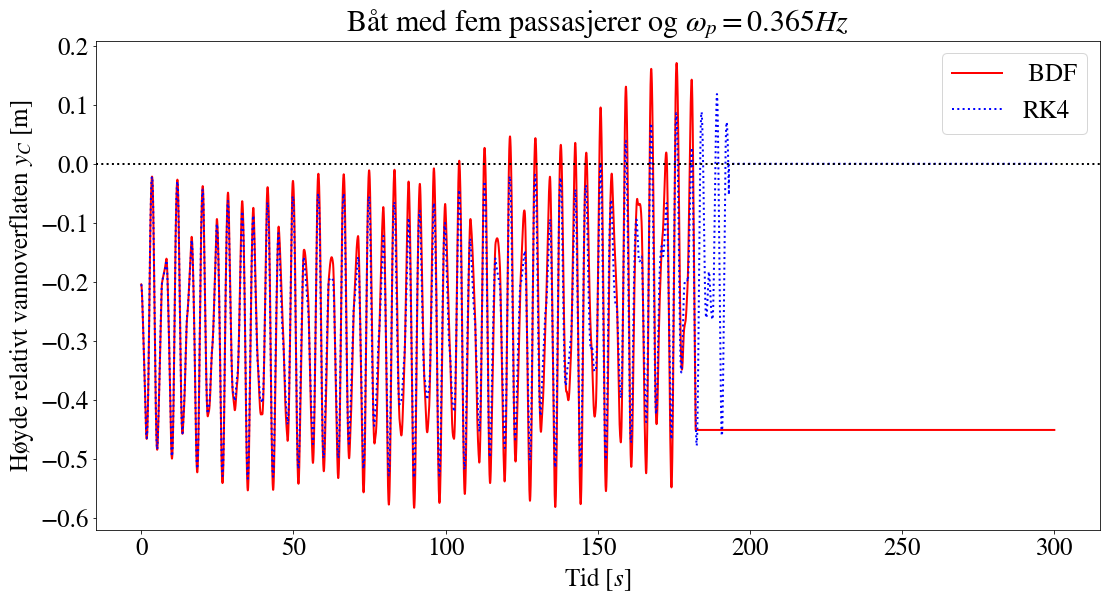

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Last t in BDF: 300.0, length of t-array: 30001
Last t in rk4: 300.0, length of t-array: 30001


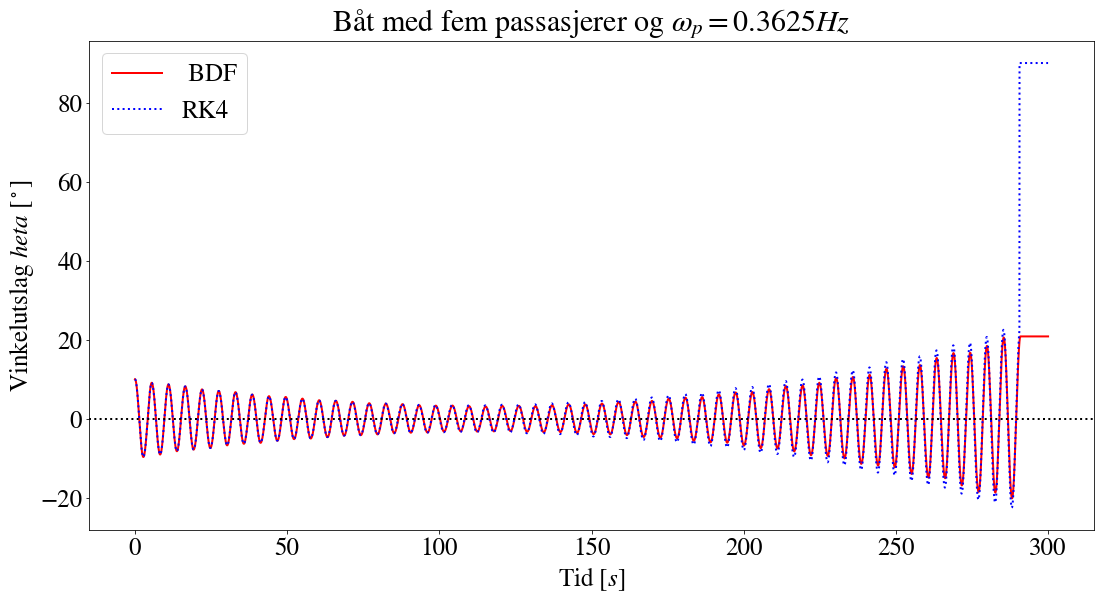

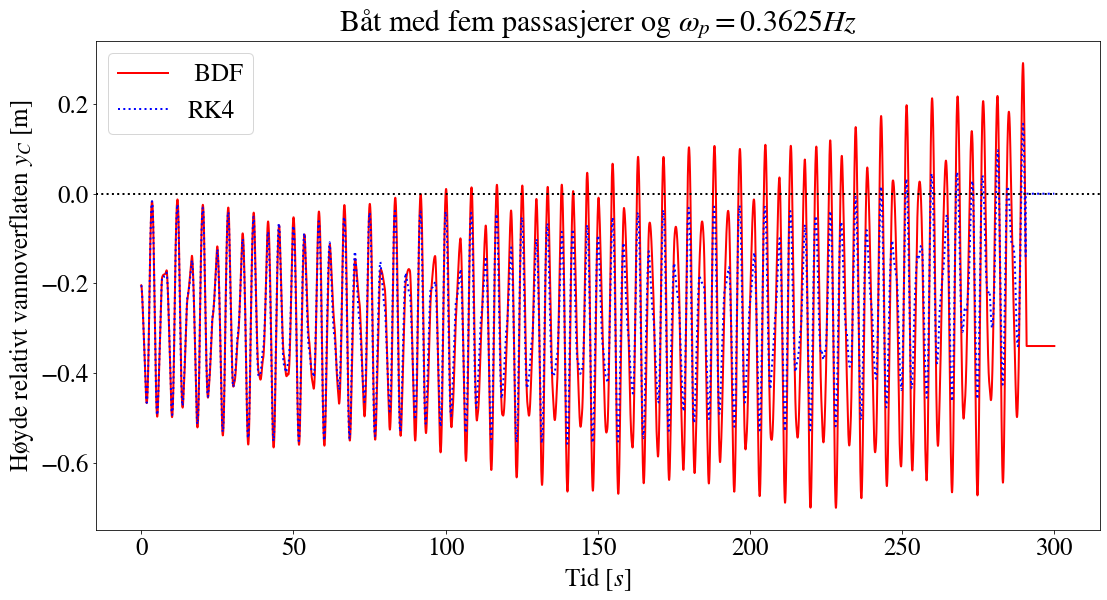

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [80]:
def jumping_people_resonance(omega_p):
    m_p = 40*80 # [kg]
    passangers = People(m_p, omega_p)
    # passangers = People(0, 0)


    ####################################################
    #   This block is repetetive
    w_start_vals = [
        10,  # theta [deg]
        0,  # omega [rad/s]
        0,  # x [m]
        0,  # y [m]
        0,  # v_x [m/s]
        0,  # v_y [m/s]
        0,  # s_L [m]
        0   # v_L [m/s]
        ]

    m_boat = A_s*sigma
    m_L = 0


    F_0 = 0 #0.4*m_boat*g         # Force of wave
    k_f = 0         # Friction coefficient
    t_end = 300      # End time
    h_step = 0.01   # Time step



    omega_0 = np.sqrt((m_boat*g*h)/calculate_I_c(0, 0))
    omega_w = 0.4*omega_0
    ######################################################
    #       Calculate t and w using the different methods
    t_rk4, w_rk4 = universal_func(
        w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L, fences_bool_input=True, crowd=passangers, 
        ode_solver=solve_ODE, method=rk4_step
    )
    t_bdf, w_bdf = universal_func(
        w_start_vals, t_end, h_step, F_0, k_f, omega_w, m_boat, m_L, fences_bool_input=True, crowd=passangers, 
        ode_solver=integrate.solve_ivp, method='BDF'
    )
    print(f'Last t in BDF: {t_bdf[-1]}, length of t-array: {len(t_bdf)}')
    print(f'Last t in rk4: {t_rk4[-1]}, length of t-array: {len(t_rk4)}')
    ######################################################
    #       Plot the THETA
    plt.plot(
        t_bdf,
        np.rad2deg(w_bdf[0]),
        color = 'red',
        label =" BDF"
        # 'o'
    )
    
    plt.plot(
        t_rk4,
        np.rad2deg(w_rk4[0]),
        color = "blue",
        label = "RK4",
        linestyle = 'dotted'
    )

    plt.legend()
    # plt.ylim(-2.5,2.5)
    plt.ylabel('Vinkelutslag $\theta$ [$^\circ$]')
    plt.xlabel('Tid [$s$]')

    plt.title(f"Båt med fem passasjerer og $\omega_p={omega_p}Hz$")
    plt.axhline(0, color="black", linestyle="dotted")
    plt.show()
    ######################################################
    #       Plot the Y
    plt.plot(
        t_bdf,
        w_bdf[3],
        color = 'red',
        label =" BDF"
        # 'o'
    )
    
    plt.plot(
        t_rk4,
        w_rk4[3],
        color = "blue",
        label = "RK4",
        linestyle = 'dotted'
    )

    plt.legend()
    # plt.ylim(-2.5,2.5)
    plt.ylabel('Høyde relativt vannoverflaten $y_C$ [m]')
    plt.xlabel('Tid [$s$]')

    plt.title(f"Båt med fem passasjerer og $\omega_p={omega_p}Hz$")
    plt.axhline(0, color="black", linestyle="dotted")
    plt.show()

    ######################################################
    #       Save the data for further calculations
    boat_information = [
        w_start_vals,
        m_boat,
        passangers,

    ]
    np.savez(
        'simulation_data/jumping_people_'+str(omega_p),
        t_rk4 = t_rk4,
        w_rk4 = w_rk4,
        t_bdf = t_bdf,
        w_bdf = w_bdf,
        boat_information = boat_information
    )

    
jumping_people_resonance(0.24)
jumping_people_resonance(0.365)
jumping_people_resonance(0.3625)


In [ ]:
def anal_vs_num_heun():
    #######################################################################################
    #       Define the functions differential equations that we will be solving
    def f_analytic(t, theta_0):
        return theta_0*np.cos( np.sqrt( (m_boat*g*h)/calculate_I_c(0, 0) )*t )
    
    # To be used in numerical solutions
    f_small_angle = lambda t, w: np.array([
        w[1],
        -(A_0 * sigma_0 * g * h)/calculate_I_c(0, 0) * w[0]
        ])


    #######################################################################################
    #       Define the inital condititons, time intervall, the array of step sizes, 
    #       and the analytic value at t=20s
    theta_0 = np.array([0.01])
    omega_0 = np.array([0])
    w_0 = np.array([
        theta_0, 
        omega_0
    ]) # Combine all the initial conditions to the array w

    t_0 = 0
    t_end = 20

    h_steps = 10**np.linspace(-1, -4, 30) #logaritmic linspace


    #######################################################################################
    #       Find the values of different methods (including analytic) at t=20s
    #       using different step sizes
    f_analytic_t_20 = f_analytic(t_end, theta_0) # Analytic value at t=20s

    theta_t20_arr_euler = np.array([])
    theta_t20_arr_heun = np.array([])
    theta_t20_arr_rk4 = np.array([])

    # Iterate through all the desired step sizes, and store them
    for h_step in h_steps:
        theta_euler    =   solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, euler_step)[1][0] #[1]: w, [0]: theta
        theta_heun = solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, heun_step)[1][0]
        theta_rk4      =   solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, rk4_step)[1][0]
        
        # t_euler, theta_euler = solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, euler_step) #[1]: w, [0]: theta)
        # t_rk4, theta_rk4 = solve_ODE(f_small_angle, t_0, t_end, w_0, h_step, euler_step) #[1]: w, [0]: theta)
        # print(f'last euler t: {t_euler[-1]}')
        # print(f'last rk4 t: {t_rk4[-1]}')

        # Store the angle at t=20s (the last angle)
        theta_t20_arr_euler =   np.append(theta_t20_arr_euler, theta_euler[-1])
        theta_t20_arr_rk4   =   np.append(theta_t20_arr_rk4 , theta_rk4[-1])
        theta_t20_arr_heun  = np.append(theta_t20_arr_heun, theta_heun[-1])


    difference_euler    = theta_t20_arr_euler   -   f_analytic_t_20
    difference_rk4      = theta_t20_arr_rk4     -   f_analytic_t_20
    difference_heun     = theta_t20_arr_heun - f_analytic_t_20
    
    #######################################################################################
    #       Save the data to a file
    
    np.savez(
        'difference_at_t20_heun',
        h_steps = h_steps,
        difference_euler = difference_euler,
        difference_rk4 = difference_rk4,
        difference_heun = difference_heun
        
        )
anal_vs_num_heun()


In [ ]:
def plot_difference():
    
    diff_data = np.load('difference_at_t20_heun.npz')
    h_steps, difference_euler, difference_rk4, difference_heun = diff_data['h_steps'], diff_data['difference_euler'], diff_data['difference_rk4'], diff_data['difference_heun']

    plt.yscale("log")
    plt.xscale("log")
    #h_steps = np.logspace(-4,-1,30)#obs: hardcoding
    plt.plot(h_steps, np.zeros(len(h_steps)),linestyle='--') # Stiplet linje i 0
    plt.plot(h_steps, np.abs(difference_euler), label = "Euler")
    plt.plot(h_steps, np.abs(difference_rk4), label = "RK4")
    plt.plot(h_steps, np.abs(difference_heun), label = "RK4")

    plt.plot(h_steps, np.repeat(12e-17,30),'|', label = "Logaritmisk linspace")
    

    plt.title("Differansen mellom den analytiske og RK4 ved t = 20 s")
    plt.xlabel('$h$')           
    plt.ylabel(r'$\Delta\theta$ [rad]')   
    plt.ylim(10e-17,0.1)        
    plt.legend(loc=3, shadow = True)
    plt.gca().invert_xaxis()#obs
    plt.show()
    def function(x, a, n,b):
        return a*x**n+b

    popt_rk4 , cov_rk4 = scipy.optimize.curve_fit(function, h_steps[0:23], np.abs(difference_rk4[0:23]))
    popt_euler , cov_euler = scipy.optimize.curve_fit(function, h_steps[10:30], np.abs(difference_euler[10:30]))
    

    a_rk4 ,n_rk4, b_rk4 = popt_rk4
    a_euler,n_euler,b_euler = popt_euler

    x_new_value = np.arange(min(h_steps), max(h_steps), 10000)
    y_new_value_rk4 = function(x_new_value, a_rk4,n_rk4, b_rk4)
    y_new_value_euler = function(x_new_value, a_euler,n_euler, b_euler)

    #plt.scatter(h_steps,np.abs(difference_rk4),color="blue",label = "Estimated curvefit")
    
    print(f'Estimated curve-fit polynomial for RK4: {a_rk4:.4f}*x^{n_rk4:.4f}+{b_rk4:.4f}, so the estimated order is {n_rk4:.2f}' )
    print(f'Estimated curve-fit polynomial for Euler: {a_euler:.4f}*x^{n_euler:.4f}+{b_euler:.4f}, so the estimated order is {n_euler:.2f}' )



plot_difference()